# Basic Tensor Operations

Basic tensor operations using TensorFlow v2.


In [182]:
from __future__ import print_function
# Completa las importaciones necesarias
import tensorflow as tf
import numpy as np # Importar numpy como np
import matplotlib.pyplot as plt # Importar matplotlib.pyplot como plt
import pandas as pd # Importar pandas como pd

In [183]:
# Define tensor constants.
#COMPLETAR: Crear constantes a=2, b=3, c=5 usando tf.constant
a = tf.constant(2)
b = tf.constant(3)
c = tf.constant(5)

In [184]:
# Various tensor operations.
# COMPLETAR: Definir operaciones add, sub, mul, div
add = a+b # Sumar a y b
sub = a-b # Restar a y b
mul = a*b # Multiplicar a y b
div = a/b # Dividir a y b

# Access tensors value.
print("add =", add.numpy())
print("sub =", sub.numpy())
print("mul =", mul.numpy())
print("div =", div.numpy())

add = 5
sub = -1
mul = 6
div = 0.6666666666666666


In [185]:
# Some more operations.
# COMPLETAR: Calcular media y suma de [a, b, c]
mean = tf.reduce_mean([a, b, c])
sum = tf.reduce_sum([a, b, c])

# Access tensors value.
print("mean =", mean.numpy())
print("sum =", sum.numpy())

mean = 3
sum = 10


In [186]:
# Matrix multiplications.
matrix1 = tf.constant([[1., 2.], [3., 4.]])
matrix2 = tf.constant([[5., 6.], [7., 8.]])

# COMPLETAR: Multiplicar matrix1 y matrix2 (2x2)
product = tf.multiply(matrix1, matrix2)

In [187]:
# Display Tensor.
product

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 5., 12.],
       [21., 32.]], dtype=float32)>

In [188]:
# Convert Tensor to Numpy.
product.numpy()

array([[ 5., 12.],
       [21., 32.]], dtype=float32)

# Fundamentos de la personalización: tensores y operaciones

Este es un tutorial de introducción a TensorFlow que muestra cómo:

- Importar el paquete deseado.
- Crear y usar tensores.
- Usar la aceleración por GPU.
- Construir una canalización de datos con  `tf.data.Dataset`.

## Importar TensorFlow

El primer paso es importar el módulo `tensorflow`. A partir de TensorFlow 2, eager execution está habilitado por default. Eager execution permite un front-end más interactivo para TensorFlow, que podrá ver con más detalle más adelante.

In [189]:
import tensorflow as tf

## Tensores

Los tensores son matrices multidimensionales. Como los objetos `ndarray` de NumPy, los objetos `tf.Tensor` tienen un tipo de datos y una forma. Además, los `tf.Tensor` pueden residir en la memoria del acelerador (como una GPU). TensorFlow provee una rica librería de operaciones (por ejemplo, `tf.math.add`, `tf.linalg.matmul`, y `tf.linalg.inv`) que consumen y producen `tf.Tensor`es. Estas operaciones convertirán automáticamente los tipos incorporados de Python. Por ejemplo:


In [190]:
# ========== EJEMPLOS DE TF.MATH ==========
# Sumar dos números escalares (1 y 2)
print(tf.math.add(1, 2))

# COMPLETAR: Sumar dos listas ([1, 2] y [3, 4])
print(tf.math.add([1, 2], [3, 4]))

# COMPLETAR: Calcular el cuadrado de 5
print(tf.math.square(5))

# COMPLETAR: Calcular la suma de los elementos de [1, 2, 3]
print(tf.math.reduce_sum([1, 2, 3]))

# COMPLETAR: Sumar los cuadrados de 2 y 3
print(tf.math.add(tf.math.square(2), tf.math.square(3)))


tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor([4 6], shape=(2,), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(13, shape=(), dtype=int32)


Cada `tf.Tensor` tiene una forma y un tipo de datos:

In [191]:
x = tf.linalg.matmul([[1]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[2 3]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Las diferencias más obvias entre los `tf.Tensor` y los arreglos NumPy son:

1. Los tensores pueden encontrarse en la memoria aceleradora (como GPU, TPU).
2. Los tensores son inmutables.

### Compatibilidad con NumPy

Es fácil convertir entre un `tf.Tensor` TensorFlow y un `ndarray` NumPy:

- Las operaciones TensorFlow convierten automáticamente los ndarrays NumPy en Tensores.
- Las operaciones NumPy convierten automáticamente los Tensores en ndarrays NumPy.

Los tensores se convierten explícitamente en ndarrays NumPy usando su método `.numpy()`. Dado que el arreglo y el `tf.Tensor` comparten la representación de memoria subyacente cuando es posible, estas conversiones suelen ser económicas. Pero compartir la representación subyacente no siempre es posible, ya que el `tf.Tensor` puede estar en la memoria de la GPU, mientras que las matrices de NumPy siempre se encuentran en la memoria del host, y la conversión implica una copia de la GPU a la memoria del host.

In [192]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.math.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to NumPy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to NumPy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


## Aceleración por GPU

Muchas operaciones de TensorFlow usan GPU para acelerar la computación. En ausencia de anotaciones, TensorFlow decide automáticamente si usar la GPU o la CPU para una operación, copiando el tensor entre la memoria de la CPU y la de la GPU si es necesario. Los tensores generados por una operación se almacenarán normalmente en la memoria del dispositivo que realizó el proceso. Por ejemplo:

In [193]:
x = tf.random.uniform([3, 3])

print("Is there a GPU available: "),
print(tf.config.list_physical_devices("GPU"))

print("Is the Tensor on GPU #0:  "),
print(x.device.endswith('GPU:0'))

Is there a GPU available: 
[]
Is the Tensor on GPU #0:  
False


### Nombres de dispositivos

La propiedad `Tensor.device` indica un nombre de cadena completamente calificado del dispositivo en el que se alojan los contenidos del Tensor. Este nombre condensa muchos detalles, como un identificador para la dirección de red del host en el que se está ejecutando este programa, y el dispositivo dentro de ese host. Un programa TensorFlow lo necesita para su ejecución distribuida. La cadena termina con `GPU:<N>` si el tensor se encuentra en la GPU número `N` del host.

### Colocación explícita en el dispositivo

En TensorFlow, la *colocación* se refiere a cómo se asignan (colocan) las operaciones individuales a un dispositivo para su ejecución. Como se mencionó anteriormente, si no se ofrece ninguna orientación explícita, TensorFlow decidirá automáticamente en qué dispositivo debe ejecutarse una operación, y copiará los tensores a ese dispositivo si es necesario.

No obstante, las operaciones TensorFlow pueden colocarse explícitamente en dispositivos específicos usando el gerente de contexto del `tf.device`. Por ejemplo:

In [194]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.linalg.matmul(x, x)

  result = time.time()-start

  print("10 loops: {:0.2f}ms".format(1000*result))

# Force execution on CPU
print("On CPU:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# Force execution on GPU #0 if available
if tf.config.list_physical_devices("GPU"):
  print("On GPU:")
  with tf.device("GPU:0"): # Or GPU:1 for the 2nd GPU, GPU:2 for the 3rd etc.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

On CPU:
10 loops: 85.77ms


## Conjuntos de datos

Esta sección usa la API `tf.data.Dataset` para construir una canalización que suministre datos a tu modelo. `tf.data.Dataset` se usa para construir canalizaciones de entrada complejas y eficaces a partir de piezas sencillas y reutilizables que suministrarán datos a los bucles de entrenamiento o evaluación de tu modelo. (Consulte la sección [tf.data: Construir canalizaciones de entrada de TensorFlow](../../guide/data.ipynb) para saber más).

### Crear un `Dataset` fuente

Cree un conjunto de datos *fuente* usando una de las funciones de fábrica como `tf.data.Dataset.from_tensors`, `tf.data.Dataset.from_tensor_slices`, o usando objetos que lean de archivos como `tf.data.TextLineDataset` o `tf.data.TFRecordDataset`. Consulte la sección *Lectura de datos de entrada* de la guía [tf.data: Construir canalizaciones de entrada de TensorFlow](../../guide/data.ipynb) para saber más.

In [195]:
ds_tensors = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])

# Create a CSV file
import tempfile
_, filename = tempfile.mkstemp()

with open(filename, 'w') as f:
  f.write("""Line 1
Line 2
Line 3
  """)

ds_file = tf.data.TextLineDataset(filename)

### Aplicar transformaciones

Use las funciones de transformación como `tf.data.Dataset.map`, `tf.data.Dataset.batch`, y `tf.data.Dataset.shuffle` para aplicar transformaciones a los registros del conjunto de datos.

In [196]:
ds_tensors = ds_tensors.map(tf.math.square).shuffle(2).batch(2)

ds_file = ds_file.batch(2)

### Iterar

Los objetos `tf.data.Dataset` admiten la iteración para recorrer los registros:

In [197]:
print('Elements of ds_tensors:')
for x in ds_tensors:
  print(x)

print('\nElements in ds_file:')
for x in ds_file:
  print(x)

Elements of ds_tensors:
tf.Tensor([4 1], shape=(2,), dtype=int32)
tf.Tensor([ 9 16], shape=(2,), dtype=int32)
tf.Tensor([36 25], shape=(2,), dtype=int32)

Elements in ds_file:


tf.Tensor([b'Line 1' b'Line 2'], shape=(2,), dtype=string)
tf.Tensor([b'Line 3' b'  '], shape=(2,), dtype=string)


# TensorFlow 2: Iniciación

En esta breve introducción se usa [Keras](https://www.tensorflow.org/guide/keras/overview) para:

1. Cargar un conjunto de datos predeterminado.
2. Crear un modelo de aprendizaje automático de red neural que clasifique las imágenes.
3. Entrenar la red neural.
4. Evaluar la exactitud del modelo.

## Preparación de TensorFlow

Para empezar, importe TensorFlow a su programa:

In [198]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0



Nota: controle haber actualizado a la última versión de `pip` para instalar el paquete de TensorFlow 2 en caso de que use su propio entorno de desarrollo. Para más detalles, consulte la [guía de instalación](https://www.tensorflow.org/install).

## Carga de un conjunto de datos

Cargue y prepare [conjunto de datos MNIST](http://yann.lecun.com/exdb/mnist/). Los valores de los pixeles de las imágenes van de 0 a 255. Escale esos valores a un rango de 0 a 1 dividiendo los valores por `255.0`. De este modo, también se convierten los datos de muestra de los enteros a números de punto flotante:

In [199]:
mnist = tf.keras.datasets.mnist

# Cargar MNIST y normalizar
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización

## Creación de un modelo de aprendizaje automático

Cree un modelo `tf.keras.Sequential`:

In [200]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


[`Sequential`](https://www.tensorflow.org/guide/keras/sequential_model) es útil para apilar capas donde cada una tiene un [tensor](https://www.tensorflow.org/guide/tensor) de entrada y uno de salida. Las capas son funciones con una estructura matemática desconocida que se puede reutilizar y que tiene variables entrenables. La mayoría de los modelos TensorFlow están compuestos por capas. Este modelo usa las capas [`Flatten`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Flatten), [`Dense`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) y [`Dropout`](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dropout).

Para cada ejemplo, el modelo devuelve un vector de [logits](https://developers.google.com/machine-learning/glossary#logits) o puntajes de [log-odds](https://developers.google.com/machine-learning/glossary#log-odds) (registro de probabilidades) por cada clase.

In [201]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.793,  0.205, -0.291,  0.494,  0.18 , -0.103, -0.109,  0.268,
         0.412,  0.105]], dtype=float32)

La función `tf.nn.softmax` convierte estas funciones logits en *probabilidades* para cada clase: 

In [202]:
tf.nn.softmax(predictions).numpy()

array([[0.041, 0.112, 0.068, 0.149, 0.109, 0.082, 0.082, 0.119, 0.137,
        0.101]], dtype=float32)

Nota: es posible aplicar la función `tf.nn.softmax` en la función de activación para la última capa de la red. Si bien esto puede hacer que la salida del modelo se interprete más directamente, este enfoque no se recomienda ya que es imposible proporcionar un cálculo de pérdida numéricamente estable y exacto para todos los modelos con salida softmax. 

Defina la función de pérdida para el entrenamiento con `losses.SparseCategoricalCrossentropy`:

In [203]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

La función de pérdida toma un vector de valores verdaderos de base y un vector de logits y devuelve una pérdida escalar para cada ejemplo. Esta pérdida es igual a la probabilidad de registro negativa de la clase verdadera: La pérdida es cero si el modelo está seguro de la clase correcta.

El modelo sin entrenar arroja probabilidades cercanas al lo aleatorio (1/10 para cada clase), entonces, la pérdida inicial debería estar cerca de `-tf.math.log(1/10) ~= 2.3`.

In [204]:
loss_fn(y_train[:1], predictions).numpy()

np.float32(2.4995806)

Antes de empezar el entrenamiento, configure y compile el modelo con Keras `Model.compile`. Configure la clase del [`optimizador`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) como `adam`, establezca `loss` para la función `loss_fn` que definió antes y especifique una métrica a evaluar para el modelo, mediante la determinación del parámetro `metrics` para `accuracy`.

In [205]:
# === COMPILACIÓN DEL MODELO ===
# Compila con:
# - Optimizer: Adam
# - Métrica: accuracy
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=loss_fn,
    metrics=['accuracy']
)

## Entrenamiento y evaluación del modelo

Use el método `Model.fit` para ajustar los parámetros del modelo y minimizar la pérdida: 

In [206]:

# === ENTRENAMIENTO ===
# Entrena por 5 épocas
model.fit(
    x_train,
    y_train,
    epochs=5
)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8609 - loss: 0.4795
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9549 - loss: 0.1527
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9670 - loss: 0.1104
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9724 - loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9778 - loss: 0.0725


El método `Model.evaluate` controla el desempeño del modelo, por lo general con un [conjunto de evaluación](https://developers.google.com/machine-learning/glossary#validation-set) o un [conjunto de prueba](https://developers.google.com/machine-learning/glossary#test-set).

In [207]:

# === EVALUACIÓN ===
# Evalúa el modelo con los datos de test
model.evaluate( x_test , y_test, verbose=2)


313/313 - 1s - 2ms/step - accuracy: 0.9767 - loss: 0.0764


[0.07644961774349213, 0.9767000079154968]

El clasificador de imágenes ahora está entrenado para proporcionar ~98% de exactitud en este conjunto de datos. Para más información, lea los [tutoriales de TensorFlow](https://www.tensorflow.org/tutorials/).

Si desea que su modelo devuelva una probabilidad, puede empaquetar el modelo entrenado y adjuntarle el softmax:

In [208]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [209]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   ,
        0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.998, 0.   , 0.   , 0.   , 0.   ,
        0.002]], dtype=float32)>

# Clasificación básica: clasifique imágenes de prendas de vestir

Esta guía sirve para entrenar un modelo de redes neuronales para que clasifique imágenes de prendas de vestir, como calzado y camisas. No es necesario que entienda todos los detalles; este es un resumen rápido de un programa completo de TensorFlow donde se explican todos los detalles sobre la marcha.

Esta guía usa [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel que se usa para desarrollar y entrenar modelos en TensorFlow.

In [210]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.19.0


## Importar el conjunto de datos Fashion MNIST

Esta guía usa el conjunto de datos [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) que contiene 70 000 imágenes en escala de grises en 10 categorías. Las imágenes muestran artículos individuales de prendas de vestir en baja resolución (28 x 28 píxeles), como se puede ver a continuación:

<table>
  <tr><td>     <img src="https://tensorflow.org/images/fashion-mnist-sprite.png" alt="Fashion MNIST sprite" width="600">   </td></tr>
  <tr><td align="center">     <b>Figura 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Muestras de Fashion-MNIST</a> (de Zalando, licencia MIT).<br> </td></tr>
</table>

Fashion MNIST fue pensado como reemplazo directo del clásico conjunto de datos [MNIST](http://yann.lecun.com/exdb/mnist/), a menudo usado como el "Hola, mundo" de los programas de aprendizaje automático para visión artificial. El conjunto de datos MNIST contiene imágenes de dígitos escritos a mano (0, 1, 2, etc.) en un formato idéntico al de las prendas de vestir que usará aquí.

Esta guía usa Fashion MNIST para variar y porque constituye un desafío ligeramente más difícil que el MNIST común. Ambos conjuntos de datos son relativamente pequeños y se usan para comprobar que un algoritmo funcione según lo previsto. Suponen un buen punto de partida para la prueba y depuración de los códigos.

Aquí, se utilizan 60 000 imágenes para entrenar la red y 10 000 imágenes para evaluar la precisión con la que la red aprendió a clasificar imágenes. Puede acceder a Fashion MNIST directamente desde TensorFlow. Importe y [cargue los datos de Fashion MNIST](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data) directamente desde TensorFlow:

In [211]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Cargar el conjunto de datos devuelve cuatro arreglos NumPy:

- Los arreglos `train_images` y `train_labels` constituyen el *conjunto de entrenamiento*, los datos que el modelo usa para aprender.
- El modelo se compara con el *conjunto de prueba*, los arreglos `test_images`, y `test_labels`.

Las imágenes son arreglos NumPy de 28x28, con valores de píxeles que van de 0 a 255. Las *letiquetas* son un arreglo de números enteros, que van de 0 a 9. Estos corresponden a la *clase* de prenda de vestir que representa la imagen:

<table>
  <tr>
    <th>Etiqueta</th>
    <th>Clase</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Cada imagen se asigna a una etiqueta única. Dado que los *nombres de las clases* no se incluyen en los conjuntos de datos, almacénelos aquí para usarlos más tarde, al trazar las imágenes:

In [212]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Explorar los datos

Antes de entrenar el modelo, exploremos el formato del conjunto de datos. A continuación, se muestra que el conjunto de entrenamiento contiene 60 000 imágenes, cada una de las cuales se representa por 28 x 28 píxeles:

In [213]:
train_images.shape

(60000, 28, 28)

Asimismo, el conjunto de entrenamiento consta de 60 000 etiquetas:

In [214]:
len(train_labels)

60000

Cada etiqueta es un número entero entre 0 y 9:

In [215]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

El conjunto de prueba está compuesto por 10 000 imágenes. Del mismo modo, cada imagen está representada por 28 x 28 píxeles:

In [216]:
test_images.shape

(10000, 28, 28)

Y el conjunto de prueba contiene 10 000 etiquetas de imágenes:

In [217]:
len(test_labels)

10000

## Preprocesar los datos

Los datos se deben preprocesar antes de entrenar la red. Si inspecciona la primera imagen en el conjunto de entrenamiento, verá que los valores de los píxeles se encuentran entre 0 y 255:

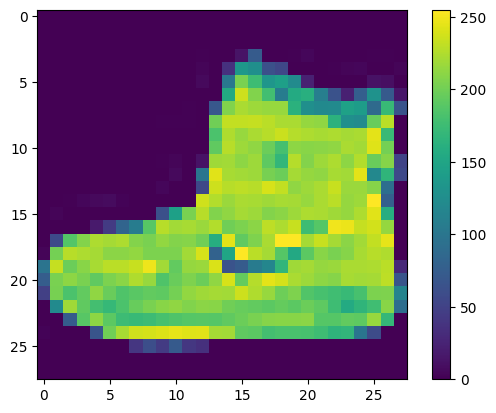

In [218]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Escale estos valores a un rango de 0 a 1 antes de cargarlos al modelo de red neuronal. Para ello, divida los valores por 255. Es importante que el *conjunto de entrenamiento* y el *conjunto de prueba* se preprocesen del mismo modo:

In [219]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Para verificar que los datos tengan el formato correcto y que usted esté listo para generar y entrenar la red, mostraremos las primeras 25 imágenes del *conjunto de entrenamiento* con el nombre de la clase debajo de cada imagen.

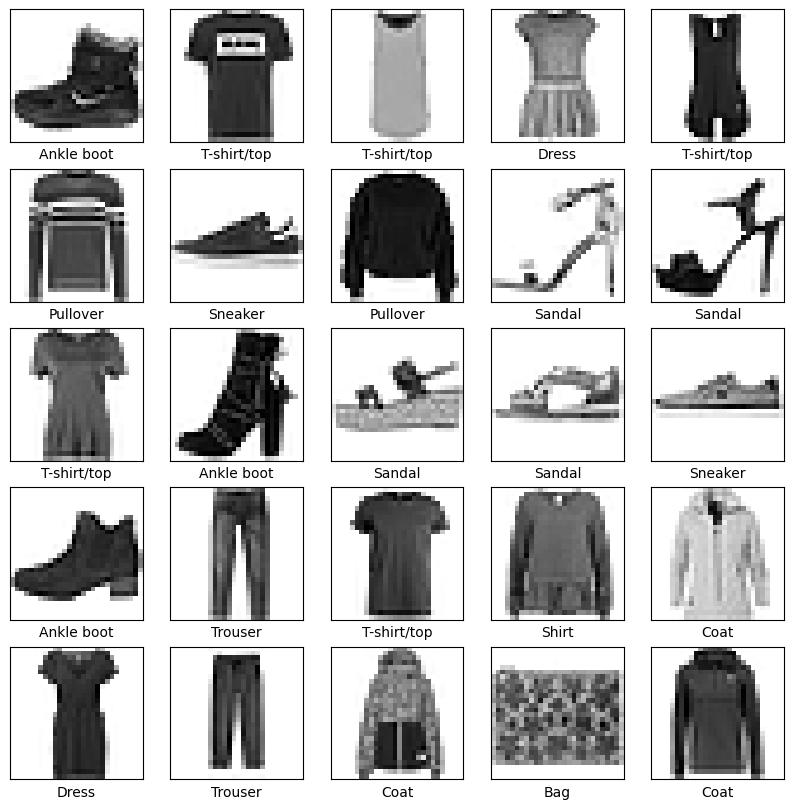

In [220]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Generar el modelo

Para generar la red neuronal es necesario configurar las capas del modelo y, a continuación, compilar el modelo.

### Configurar las capas

La [*capa*](https://www.tensorflow.org/api_docs/python/tf/keras/layers) es el componente básico de una red neuronal. Las capas extraen las representaciones de los datos que les cargan. Se espera que dichas representaciones sean significativas para el problema en cuestión.

La mayor parte del aprendizaje profundo consiste en encadenar capas simples. La mayoría de las capas, como `tf.keras.layers.Dense`, tienen parámetros que se aprenden durante el entrenamiento.

In [221]:
# Crea modelo secuencial con:
# 1. Capa Flatten de entrada (28,28)
# 2. Capa Dense de 128 neuronas con activación ReLU
# 4. Capa Dense de salida con 10 neuronas
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])


La primera capa de esta red, `tf.keras.layers.Flatten`, transforma el formato de las imágenes de un arreglo de dos dimensiones (de 28 x 28 píxeles) a un arreglo de una dimensión (de 28 * 28 = 784 píxeles). Piense en esta capa como una forma de desapilar las filas de píxeles de la imagen y alinearlas. Esta capa no tiene parámetros que aprender; sólo vuelve a dar formato a los datos.

Luego de aplanar los píxeles, la red consiste de una secuencia de dos capas `tf.keras.layers.Dense`. Estas son capas neuronales densamente conectadas (o completamente conectadas). La primera capa `Dense` cuenta de 128 nodos (o neuronas). La segunda (y última capa) devuelve un arreglo logits con una longitud de 10. Cada nodo contiene un puntaje que indica que la imagen actual pertenece a una de las 10 clases.

### Compilar el modelo

Antes de que el modelo esté listo para entrenamiento, necesita algunos ajustes más. Estos ajustes se agregan durante el paso de [*compilación*](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile) del modelo:

- [*Función de pérdida*](https://www.tensorflow.org/api_docs/python/tf/keras/losses): mide el nivel de precisión del modelo durante el entrenamiento. Se busca minimizar esta función para "dirigir" el modelo en la dirección correcta.
- [*Optimizador*](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers): se refiere al modo en que se actualiza el modelo en función de los datos que ve y su función de pérdida.
- [*Métricas*](https://www.tensorflow.org/api_docs/python/tf/keras/metrics): se usan para monitorear los pasos de entrenamiento y prueba. El siguiente ejemplo usa *precisión*, la fracción de imágenes que se clasificaron correctamente.

In [222]:
# Compila con:
# - Optimizer: Adam
# - Métrica: accuracy
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


## Entrenar el modelo

Para entrenar el modelo de redes neuronales, se requieren los siguientes pasos:

1. Cargue los datos de entrenamiento al modelo. En este ejemplo, los datos de entrenamiento están en los arreglos `train_images` y `train_labels`.
2. El modelo aprende a asociar imágenes con etiquetas.
3. Usted le pide al modelo que haga predicciones sobre un conjunto de prueba, en este ejemplo, el arreglo `test_images`.
4. Verifique que las predicciones coincidan con las etiquetas del arreglo `test_labels`.


### Cargar el modelo

Para comenzar el entrenamiento, llame el método [`model.fit`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit), llamado así porque "ajusta" el modelo a los datos de entrenamiento:

In [223]:

# === ENTRENAMIENTO ===
# Entrena por 10 épocas
model.fit(
    x_train,
    y_train,
    epochs=10
)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8567 - loss: 0.4911
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9560 - loss: 0.1496
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9673 - loss: 0.1073
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9742 - loss: 0.0853
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9756 - loss: 0.0746
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9794 - loss: 0.0647
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9810 - loss: 0.0575
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9827 - loss: 0.0498
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9846 - loss: 0.0466
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9855 - loss: 0.0436


A medida que se entrena el modelo, se muestran las métricas de pérdida y precisión. Este modelo alcanza una precisión de 0,91 (o 91 %) en los datos de entrenamiento.

### Evaluar la precisión

A continuación, compare el rendimiento del modelo en el conjunto de prueba:

In [224]:

# === EVALUACIÓN ===
# Evalúa el modelo con los datos de test
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9789 - loss: 0.0708

Test accuracy: 0.9789000153541565


Se observa que la precisión del conjunto de prueba es un poco menor que la precisión del conjunto de entrenamiento. Esta brecha entre la precisión de entrenamiento y de prueba representa un *sobreajuste*. El sobreajuste se produce cuando un modelo de aprendizaje automático rinde menos con entradas nuevas o desconocidas que con los datos de entrenamiento. Un modelo sobreajustado "memoriza" el ruido y los detalles del conjunto de datos de entrenamiento en una medida que afecta negativamente el rendimiento del modelo con los nuevos datos. Si desea obtener más información, consulte los siguientes recursos:

- [Demostrar sobreajuste](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
- [Estrategias para evitar el sobreajuste](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Hacer predicciones

Una vez que cuenta con el modelo entrenado, puede usarlo para hacer predicciones sobre algunas imágenes. Adjunte una capa softmax para convertir las salidas lineales del modelo ([logits](https://developers.google.com/machine-learning/glossary#logits)) en probabilidades, que deberían ser más fáciles de interpretar.

In [225]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [226]:
# === PREDICCIÓN ===
# Realiza una predicción con el modelo 
predictions = probability_model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Aquí, el modelo predijo la etiqueta para cada imagen del conjunto de prueba. Veamos la primera predicción:

In [227]:
predictions[0]

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

Una predicción es un arreglo de 10 números que representan la "confianza" del modelo en que la imagen corresponde a una de las 10 distintas prendas de vestir. Puede ver qué etiqueta tiene el valor de confianza más alto:

In [228]:
np.argmax(predictions[0])

np.int64(2)

Entonces, el modelo tiene más confianza en que esta imagen corresponde a una botineta, o `class_names[9]`. Al examinar la etiqueta de prueba vemos que esta clasificación es correcta:

In [229]:
test_labels[0]

np.uint8(9)

Grafique esto para ver el conjunto completo de predicciones de 10 clases.

In [230]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verificar las predicciones

Cuando haya entrenado el modelo, podrá usarlo para hacer predicciones de algunas imágenes.

Veamos la imagen 0, las predicciones y el arreglo de predicción. Las predicciones correctas se muestran en azul y las etiquetas de las predicciones incorrectas en rojo. El número indica el porcentaje (de 100) de la etiqueta predicha.

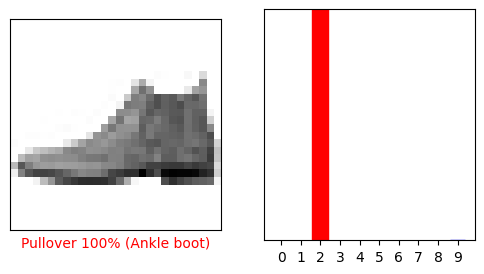

In [231]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

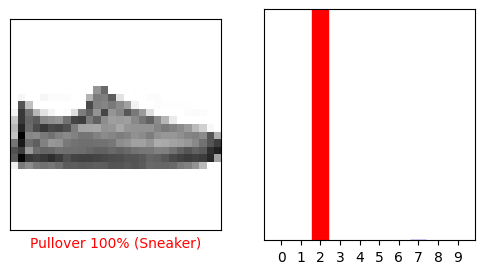

In [232]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Tracemos varias imágenes con sus predicciones. Tenga en cuenta que el modelo puede equivocarse incluso cuando el nivel de confianza sea alto.

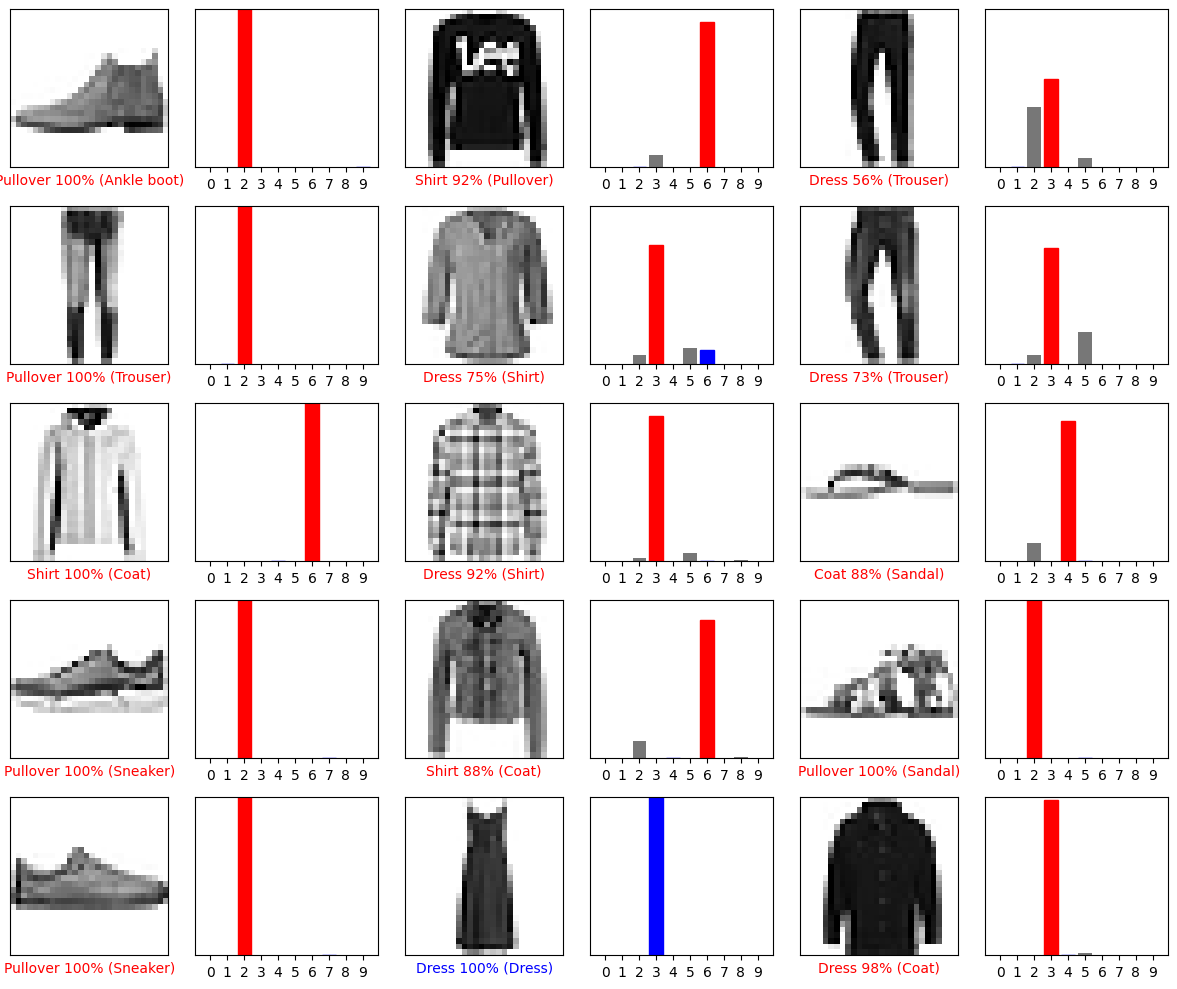

In [233]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Usar el modelo entrenado

Por último, use el modelo entrenado para hacer predicciones de una sola imagen.

In [234]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


Los modelos `tf.keras` se optimizaron para hacer predicciones sobre un *lote*, o colección, de ejemplos al mismo tiempo. Por lo tanto, aunque utilice una sola imagen, debe añadirla a una lista:

In [235]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Ahora, prediga la etiqueta correcta para esta imagen:

In [236]:
# === PREDICCIÓN ===
# Realiza una predicción con el modelo 
predictions_single = probability_model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
[[0.    0.    0.001 0.077 0.    0.002 0.92  0.    0.001 0.   ]]


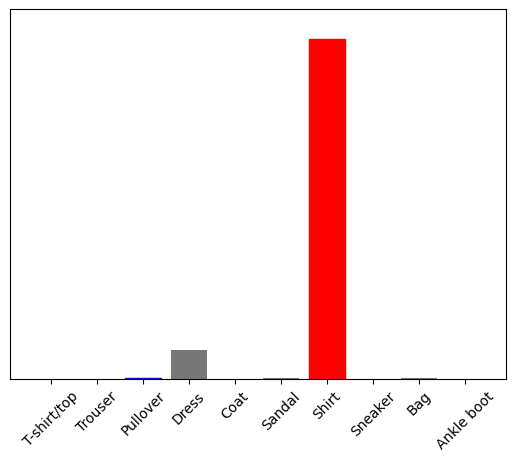

In [237]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

`tf.keras.Model.predict` devuelve una lista de listas (una lista para cada imagen del lote de datos). Tome las predicciones de nuestra (única) imagen en el lote:

In [238]:
np.argmax(predictions_single[0])

np.int64(6)

Y el modelo predice una etiqueta, como era de esperarse.

# Cargar datos CSV

Este tutorial da ejemplos de cómo usar datos CSV con TensorFlow.

Hay dos partes principales:

1. **Cargar los datos del disco**
2. **Preprocesarlos en una forma adecuada para el entrenamiento.**

Este tutorial se centra en la carga y ofrece algunos ejemplos rápidos de preprocesamiento. Para aprender más sobre el aspecto del preprocesamiento, consulte la guía [Trabajar con capas de preprocesamiento](https://www.tensorflow.org/guide/keras/preprocessing_layers) y el tutorial [Clasificar datos estructurados utilizando capas de preprocesamiento Keras](../structured_data/preprocessing_layers.ipynb).


## Preparación

In [239]:
import pandas as pd
import numpy as np

# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow.keras import layers

## Cargar datos en la memoria

Para cualquier conjunto de datos CSV pequeño, la forma más sencilla de entrenar un modelo TensorFlow en él es cargarlo en memoria como un Dataframe pandas o un arreglo de NumPy.


Un ejemplo relativamente sencillo es el [conjunto de datos de abalones](https://archive.ics.uci.edu/ml/datasets/abalone).

- El conjunto de datos es pequeño.
- Todas las características de entrada son valores de punto flotante de rango limitado.

Así es como se descargan los datos en un [`DataFrame` pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html):

In [240]:
abalone_train = pd.read_csv(
    "https://storage.googleapis.com/download.tensorflow.org/data/abalone_train.csv",
    names=["Length", "Diameter", "Height", "Whole weight", "Shucked weight",
           "Viscera weight", "Shell weight", "Age"])

abalone_train.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.435,0.335,0.110,0.334,0.1355,0.0775,0.0965,7
1,0.585,0.450,0.125,0.874,0.3545,0.2075,0.2250,6
2,0.655,0.510,0.160,1.092,0.3960,0.2825,0.3700,14
3,0.545,0.425,0.125,0.768,0.2940,0.1495,0.2600,16
4,0.545,0.420,0.130,0.879,0.3740,0.1695,0.2300,13


El conjunto de datos contiene una serie de mediciones de [abalones](https://en.wikipedia.org/wiki/Abalone), un tipo de molusco marino.

![una concha de abalón](https://tensorflow.org/images/abalone_shell.jpg)

[“Concha de abalón”](https://www.flickr.com/photos/thenickster/16641048623/) (por [Nicki Dugan Pogue](https://www.flickr.com/photos/thenickster/), CC BY-SA 2.0)


La tarea nominal de este conjunto de datos es predecir la edad a partir de las demás medidas, por lo que se separan las características y las etiquetas para el entrenamiento:


In [241]:
abalone_features = abalone_train.copy()
abalone_labels = abalone_features.pop('Age')

Para este conjunto de datos tratará todas las características de forma idéntica. Empaquete las características en un único arreglo NumPy.:

In [242]:
abalone_features = np.array(abalone_features)
abalone_features

array([[0.435, 0.335, 0.11 , ..., 0.136, 0.077, 0.097],
       [0.585, 0.45 , 0.125, ..., 0.354, 0.207, 0.225],
       [0.655, 0.51 , 0.16 , ..., 0.396, 0.282, 0.37 ],
       ...,
       [0.53 , 0.42 , 0.13 , ..., 0.374, 0.167, 0.249],
       [0.395, 0.315, 0.105, ..., 0.118, 0.091, 0.119],
       [0.45 , 0.355, 0.12 , ..., 0.115, 0.067, 0.16 ]])

Luego haga que un modelo de regresión prediga la edad. Dado que sólo hay un único tensor de entrada, basta aquí con un modelo `tf.keras.Sequential`.

In [243]:
abalone_model = tf.keras.Sequential([
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                      optimizer = tf.keras.optimizers.Adam())

Para entrenar ese modelo, pase las características y las etiquetas a `Model.fit`:

In [244]:
# === ENTRENAMIENTO ===
# Entrena por 10 épocas
abalone_model.fit(
    abalone_features,
    abalone_labels,
    epochs=10
)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 103.4551  
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 54.0017
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 15.2243
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4739
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.4437
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 8.1719
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.5943
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.3995
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.6662
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.9758


Acaba de ver la forma más básica de entrenar un modelo usando datos CSV. Ahora, aprenderá a aplicar el preprocesamiento para normalizar las columnas numéricas.

## Preprocesamiento básico

Es una buena práctica normalizar las entradas a su modelo. Las capas de preprocesamiento Keras aportan una forma cómoda de incorporar esta normalización a su modelo.

La capa `tf.keras.layers.Normalization` calcula previamente la media y la varianza de cada columna, y las usa para normalizar los datos.

En primer lugar, cree la capa:

In [245]:
normalize = layers.Normalization()

Luego, use el método `Normalization.adapt` para adaptar la capa de normalización a sus datos.

Nota: Utilice únicamente sus datos de entrenamiento con el método `PreprocessingLayer.adapt`. No use sus datos de validación o de prueba.

In [246]:
normalize.adapt(abalone_features)

Luego, use la capa de normalización en su modelo:

In [247]:
norm_abalone_model = tf.keras.Sequential([
  normalize,
  layers.Dense(64, activation='relu'),
  layers.Dense(1)
])

norm_abalone_model.compile(loss = tf.keras.losses.MeanSquaredError(),
                           optimizer = tf.keras.optimizers.Adam())

# === ENTRENAMIENTO ===
# Entrena por 10 épocas
norm_abalone_model.fit(
    abalone_features,
    abalone_labels,
    epochs=10
)


Epoch 1/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 88.0146
Epoch 2/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 41.5658
Epoch 3/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.9049
Epoch 4/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.0621
Epoch 5/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.5852
Epoch 6/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.1224
Epoch 7/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.5757
Epoch 8/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3519
Epoch 9/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.8163
Epoch 10/10
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 5.4400


## Tipos de datos mezclados

El conjunto de datos "Titanic" contiene información sobre los pasajeros del Titanic. La tarea nominal en este conjunto de datos es predecir quién sobrevivió.

![El Titanic](images/csv/Titanic.jpg)

Imagen de [Wikimedia](https://commons.wikimedia.org/wiki/File:RMS_Titanic_3.jpg)

Los datos sin procesar pueden cargarse fácilmente como un `DataFrame` de Pandas, pero no son inmediatamente utilizables como entrada para un modelo TensorFlow.


In [248]:
titanic = pd.read_csv("https://storage.googleapis.com/tf-datasets/titanic/train.csv")
titanic.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [249]:
titanic_features = titanic.copy()
titanic_labels = titanic_features.pop('survived')

Como los tipos de datos y rangos son diferentes, no puede simplemente acumular las funciones en un arreglo NumPy y pasarlo a un modelo `tf.keras.Sequential`. Cada columna necesita ser manejada individualmente.

Como opción, podría preprocesar sus datos fuera de línea (usando cualquier herramienta que desee) para convertir columnas categóricas en columnas numéricas, y luego pasar la salida procesada a su modelo TensorFlow. La desventaja de ese enfoque es que si guarda y exporta su modelo, el preprocesamiento no se guarda con él. Las capas Keras de preprocesamiento evitan este problema porque forman parte del modelo.


En este ejemplo, construirá un modelo que implementa la lógica de preprocesamiento usando [la API funcional de Keras](https://www.tensorflow.org/guide/keras/functional). También podría hacerlo mediante [subclases](https://www.tensorflow.org/guide/keras/custom_layers_and_models).

La API funcional opera con tensores "simbólicos". Los tensores "eager" normales tienen un valor. En cambio, estos tensores "simbólicos" no lo tienen. En su lugar, llevan un seguimiento de las operaciones que se ejecutan sobre ellos, y construyen una representación del cálculo, que puede ejecutar más tarde. He aquí un ejemplo rápido:

In [250]:
# Create a symbolic input
input = tf.keras.Input(shape=(), dtype=tf.float32)

# Perform a calculation using the input
result = 2*input + 1

# the result doesn't have a value
result

<KerasTensor shape=(None,), dtype=float32, sparse=False, ragged=False, name=keras_tensor_148>

In [251]:
calc = tf.keras.Model(inputs=input, outputs=result)

Para construir el modelo de preprocesamiento, se empieza por construir un conjunto de objetos simbólicos `tf.keras.Input`, que coincidan con los nombres y tipos de datos de las columnas CSV.

In [252]:
inputs = {}

for name, column in titanic_features.items():
  dtype = column.dtype
  if dtype == object:
    dtype = tf.string
  else:
    dtype = tf.float32

  inputs[name] = tf.keras.Input(shape=(1,), name=name, dtype=dtype)

inputs

{'sex': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=sex>,
 'age': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=age>,
 'n_siblings_spouses': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=n_siblings_spouses>,
 'parch': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=parch>,
 'fare': <KerasTensor shape=(None, 1), dtype=float32, sparse=False, ragged=False, name=fare>,
 'class': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=class>,
 'deck': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=deck>,
 'embark_town': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=embark_town>,
 'alone': <KerasTensor shape=(None, 1), dtype=string, sparse=False, ragged=False, name=alone>}

El primer paso en su lógica de preprocesamiento es concatenar las entradas numéricas y hacerlas pasar por una capa de normalización:

In [253]:
numeric_inputs = {name:input for name,input in inputs.items()
                  if input.dtype==tf.float32}

x = layers.Concatenate()(list(numeric_inputs.values()))
norm = layers.Normalization()
norm.adapt(np.array(titanic[numeric_inputs.keys()]))
all_numeric_inputs = norm(x)

all_numeric_inputs

<KerasTensor shape=(None, 4), dtype=float32, sparse=False, ragged=False, name=keras_tensor_150>

Recoge todos los resultados del preprocesamiento simbólico, para concatenarlos posteriormente:

In [254]:
preprocessed_inputs = [all_numeric_inputs]

Para las entradas de cadena use la función `tf.keras.layers.StringLookup` para mapear de cadenas a índices enteros en un vocabulario. A continuación, use `tf.keras.layers.CategoryEncoding` para convertir los índices en datos `float32` apropiados para el modelo.

Los ajustes predeterminados para la capa `tf.keras.layers.CategoryEncoding` crean un vector de un solo golpe para cada entrada. Una capa `tf.keras.layers.Embedding` también funcionaría. Consulte la guía [Trabajar con capas de preprocesamiento](https://www.tensorflow.org/guide/keras/preprocessing_layers) y el tutorial [Clasificar datos estructurados usando capas de preprocesamiento Keras](../structured_data/preprocessing_layers.ipynb) para más información sobre este tema.

In [255]:
for name, input in inputs.items():
  if input.dtype == tf.float32:
    continue
  
  lookup = layers.StringLookup(vocabulary=np.unique(titanic_features[name]))
  one_hot = layers.CategoryEncoding(num_tokens=lookup.vocabulary_size())

  x = lookup(input)
  x = one_hot(x)
  preprocessed_inputs.append(x)

Con la recolección de `inputs` y `preprocessed_inputs`, puede concatenar todas las entradas preprocesadas y construir un modelo que se encargue del preprocesamiento:

In [256]:
preprocessed_inputs_cat = layers.Concatenate()(preprocessed_inputs)

titanic_preprocessing = tf.keras.Model(inputs, preprocessed_inputs_cat)

tf.keras.utils.plot_model(model = titanic_preprocessing , rankdir="LR", dpi=72, show_shapes=True)

You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


Este modelo sólo contiene el preprocesamiento de entrada. Puede ejecutarlo para ver lo que hace con sus datos. Los modelos Keras no convierten automáticamente los pandas `DataFrame`s porque no está claro si se debe convertir a un tensor o a un diccionario de tensores. Por lo tanto, conviértalo en un diccionario de tensores:

In [257]:
titanic_features_dict = {name: np.array(value) 
                         for name, value in titanic_features.items()}

Corte el primer ejemplo de entrenamiento y páselo a este modelo de preprocesamiento, verá las características numéricas y las cadenas de un solo paso todas concatenadas:

In [258]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}
titanic_preprocessing(features_dict)

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-0.61 ,  0.395, -0.479, -0.497,  0.   ,  0.   ,  1.   ,  0.   ,
         0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
         0.   ,  0.   ,  0.   ,  1.   ,  0.   ,  0.   ,  0.   ,  1.   ,
         0.   ,  0.   ,  1.   ,  0.   ]], dtype=float32)>

Ahora, construya el modelo sobre esto:

In [259]:
def titanic_model(preprocessing_head, inputs):
  body = tf.keras.Sequential([
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  preprocessed_inputs = preprocessing_head(inputs)
  result = body(preprocessed_inputs)
  model = tf.keras.Model(inputs, result)

  model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                optimizer=tf.keras.optimizers.Adam())
  return model

titanic_model = titanic_model(titanic_preprocessing, inputs)

Cuando entrene el modelo, pase el diccionario de características como `x`, y la etiqueta como `y`.

In [260]:
# === ENTRENAMIENTO ===
# Entrena por 10 épocas
titanic_model.fit(
    titanic_features_dict,
    titanic_labels,
    epochs=10
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.6848
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6085 
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5428 
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5137 
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4759 
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4595 
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4500 
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4268 
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4101 
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4202 


Dado que el preprocesamiento forma parte del modelo, puede guardar el modelo y volver a cargarlo en otro lugar y obtener resultados idénticos:

In [261]:
# === GUARDAR/CARGAR MODELO ===
# Guarda el modelo completo en formato Keras
titanic_model.save('test.keras')

# Carga el modelo guardado
reloaded = tf.keras.models.load_model('test.keras')

In [262]:
features_dict = {name:values[:1] for name, values in titanic_features_dict.items()}

before = titanic_model(features_dict)
after = reloaded(features_dict)
assert (before-after)<1e-3
print(before)
print(after)

tf.Tensor([[-2.056]], shape=(1, 1), dtype=float32)
tf.Tensor([[-2.056]], shape=(1, 1), dtype=float32)


## Usar tf.data


En la sección anterior, usted confió en el mezclado y procesamiento por lotes de datos incorporado en el modelo durante el entrenamiento del mismo.

Si necesita más control sobre la canalización de los datos de entrada o necesita usar datos que no caben fácilmente en la memoria: use `tf.data`.

Para más ejemplos, consulte la [`tf.data`: Construir canalizaciones de entrada TensorFlow](../../guide/data.ipynb).

### Sobre datos en memoria

Como primer ejemplo de aplicación de `tf.data` a datos CSV, considere el siguiente código para trocear manualmente el diccionario de características de la sección anterior. Para cada índice, toma ese índice para cada característica:


In [263]:
import itertools

def slices(features):
  for i in itertools.count():
    # For each feature take index `i`
    example = {name:values[i] for name, values in features.items()}
    yield example

Ejecútelo e imprima el primer ejemplo:

In [264]:
for example in slices(titanic_features_dict):
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : male
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : Third
deck               : unknown
embark_town        : Southampton
alone              : n


El cargador de datos en memoria `tf.data.Dataset` más básico es el constructor `Dataset.from_tensor_slices`. Éste devuelve un `tf.data.Dataset` que implementa una versión generalizada de la función `slices` anterior, en TensorFlow.

In [265]:
features_ds = tf.data.Dataset.from_tensor_slices(titanic_features_dict)

Puede iterar sobre un `tf.data.Dataset` como cualquier otro iterable de python:

In [266]:
for example in features_ds:
  for name, value in example.items():
    print(f"{name:19s}: {value}")
  break

sex                : b'male'
age                : 22.0
n_siblings_spouses : 1
parch              : 0
fare               : 7.25
class              : b'Third'
deck               : b'unknown'
embark_town        : b'Southampton'
alone              : b'n'


La función `from_tensor_slices` puede manejar cualquier estructura de diccionarios anidados o tuplas. El siguiente código crea un conjunto de datos de pares `(features_dict, labels)`:

In [267]:
titanic_ds = tf.data.Dataset.from_tensor_slices((titanic_features_dict, titanic_labels))

Para entrenar un modelo usando este `Dataset`, necesitará al menos hacer `shuffle` y `batch` los datos.

In [268]:
titanic_batches = titanic_ds.shuffle(len(titanic_labels)).batch(32)

En lugar de pasar `features` y `labels` a `Model.fit`, se pasa el conjunto de datos:

In [269]:
titanic_model.fit(titanic_batches, epochs=5)

Epoch 1/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4029   
Epoch 2/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4024
Epoch 3/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3805
Epoch 4/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3714
Epoch 5/5
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4025


### Desde un único archivo

Hasta ahora este tutorial ha trabajado con datos en memoria. `tf.data` es un conjunto de herramientas altamente escalable para construir canalizaciones de datos, y ofrece algunas funciones para tratar la carga de archivos CSV. 

In [270]:
titanic_file_path = tf.keras.utils.get_file("train.csv", "https://storage.googleapis.com/tf-datasets/titanic/train.csv")

Ahora lea los datos CSV del archivo y cree un `tf.data.Dataset`.

(Para ver la documentación completa, consulte `tf.data.experimental.make_csv_dataset`)


In [271]:
titanic_csv_ds = tf.data.experimental.make_csv_dataset(
    titanic_file_path,
    batch_size=5, # Artificially small to make examples easier to show.
    label_name='survived',
    num_epochs=1,
    ignore_errors=True,)

Esta función incluye muchas características convenientes, por lo que es fácil trabajar con los datos. Esto incluye:

- Usar las cabeceras de las columnas como claves del diccionario.
- Determinar automáticamente el tipo de cada columna.

Precaución: Asegúrese de establecer el argumento `num_epochs` en `tf.data.experimental.make_csv_dataset`, de lo contrario el comportamiento predeterminado para `tf.data.Dataset` es hacer un bucle sin fin.

In [272]:
for batch, label in titanic_csv_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value}")
  print()
  print(f"{'label':20s}: {label}")

sex                 : [b'female' b'male' b'male' b'male' b'male']
age                 : [28. 28. 22. 18. 28.]
n_siblings_spouses  : [1 1 0 0 0]
parch               : [0 0 0 0 0]
fare                : [16.1   15.85   7.229 11.5    0.   ]
class               : [b'Third' b'Third' b'Third' b'Second' b'First']
deck                : [b'unknown' b'unknown' b'unknown' b'unknown' b'B']
embark_town         : [b'Southampton' b'Southampton' b'Cherbourg' b'Southampton' b'Southampton']
alone               : [b'n' b'n' b'y' b'y' b'y']

label               : [1 0 0 0 0]


Nota: Si ejecuta la celda anterior dos veces producirá resultados diferentes. Los ajustes predeterminados para `tf.data.experimental.make_csv_dataset` incluyen `shuffle_buffer_size=1000`, que es más que suficiente para este pequeño conjunto de datos, pero puede no serlo para un conjunto de datos del mundo real.

También puede descomprimir los datos sobre la marcha. Aquí tiene un archivo CSV descomprimido que contiene el [conjunto de datos de tráfico interestatal de metro](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

![Un atasco de tráfico.](images/csv/traffic.jpg)

Imagen [de Wikimedia](https://commons.wikimedia.org/wiki/File:Trafficjam.jpg)


In [273]:
traffic_volume_csv_gz = tf.keras.utils.get_file(
    'Metro_Interstate_Traffic_Volume.csv.gz', 
    "https://archive.ics.uci.edu/ml/machine-learning-databases/00492/Metro_Interstate_Traffic_Volume.csv.gz",
    cache_dir='.', cache_subdir='traffic')

Ajuste el argumento `compression_type` para leer directamente del archivo comprimido:

In [274]:
traffic_volume_csv_gz_ds = tf.data.experimental.make_csv_dataset(
    traffic_volume_csv_gz,
    batch_size=256,
    label_name='traffic_volume',
    num_epochs=1,
    compression_type="GZIP")

for batch, label in traffic_volume_csv_gz_ds.take(1):
  for key, value in batch.items():
    print(f"{key:20s}: {value[:5]}")
  print()
  print(f"{'label':20s}: {label[:5]}")

holiday             : [b'None' b'None' b'None' b'None' b'None']
temp                : [290.01 266.41 258.34 296.95 267.23]
rain_1h             : [0. 0. 0. 0. 0.]
snow_1h             : [0. 0. 0. 0. 0.]
clouds_all          : [ 0 90  5 44 90]
weather_main        : [b'Clear' b'Mist' b'Clear' b'Clouds' b'Mist']
weather_description : [b'Sky is Clear' b'mist' b'sky is clear' b'scattered clouds' b'mist']
date_time           : [b'2013-06-15 01:00:00' b'2013-01-03 22:00:00' b'2013-02-04 09:00:00'
 b'2013-06-30 15:00:00' b'2013-02-23 09:00:00']

label               : [ 723 1550 5463 4397 3524]


Nota: Si necesita analizar esas cadenas de fecha y hora en la canalización `tfa.data`, puede usar `tfa.text.parse_time`.

### Almacenamiento en caché

El análisis sintáctico de los datos CSV conlleva algunos esfuerzos. Para los modelos pequeños esto puede ser el cuello de botella en el entrenamiento.

Dependiendo de su caso de uso, puede ser una buena idea usar `Dataset.cache` o `tf.data.Dataset.snapshot`, para que los datos CSV sólo se parseen en la primera época.

La principal diferencia entre los métodos `cache` y `snapshot` es que los archivos `cache` sólo pueden ser usados por el proceso TensorFlow que los creó, pero los archivos `snapshot` pueden ser leídos por otros procesos.

Por ejemplo, iterar sobre el `traffic_volume_csv_gz_ds` 20 veces puede llevar unos 15 segundos sin almacenamiento en caché, o unos dos segundos con almacenamiento en caché.

In [275]:
%%time
for i, (batch, label) in enumerate(traffic_volume_csv_gz_ds.repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: total: 12.9 s
Wall time: 9.1 s


Nota: `Dataset.cache` almacena los datos de la primera época y los reproduce en orden. Por tanto, usar el método `cache` desactiva cualquier mezcla anterior en la canalización. Más adelante, `Dataset.shuffle` se vuelve a añadir después de `Dataset.cache`.

In [276]:
%%time
caching = traffic_volume_csv_gz_ds.cache().shuffle(1000)

for i, (batch, label) in enumerate(caching.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: total: 1.81 s
Wall time: 2.65 s


Nota: Los archivos `tf.data.Dataset.snapshot` están pensados para el almacenamiento *temporal* de un conjunto de datos mientras se usa. Este *no* es un formato para el almacenamiento a largo plazo. El formato de archivo se considera un detalle interno, y no se garantiza entre las versiones de TensorFlow.

In [277]:
%%time
snapshotting = traffic_volume_csv_gz_ds.snapshot('titanic.tfsnap').shuffle(1000)

for i, (batch, label) in enumerate(snapshotting.shuffle(1000).repeat(20)):
  if i % 40 == 0:
    print('.', end='')
print()

...............................................................................................
CPU times: total: 2.38 s
Wall time: 2.19 s


Si la carga de sus datos se ralentiza al cargar archivos CSV, y `Dataset.cache` y `tf.data.Dataset.snapshot` son insuficientes para su caso de uso, considere la posibilidad de recodificar sus datos en un formato más ágil.

# Entrenamiento personalizado: tutorial

Este tutorial le muestra cómo entrenar un modelo de aprendizaje automático con un bucle de entrenamiento personalizado para *categorizar* pingüinos por especies. En este bloc de notas, usará TensorFlow para hacer lo siguiente:

1. Importar un conjunto de datos
2. Construir un modelo lineal simple
3. Entrenar el modelo
4. Evaluar la eficacia del modelo
5. Usar el modelo entrenado para hacer predicciones

## Programar el TensorFlow

Este tutorial demuestra las siguientes tareas de programación de TensorFlow:

- Importar datos con la [API de conjuntos de datos de TensorFlow](https://www.tensorflow.org/datasets/overview#load_a_dataset)
- Construir modelos y capas con la [API Keras](https://www.tensorflow.org/guide/keras/)


## Problema de clasificación de pingüinos

Imagine que es un ornitólogo en busca de cómo categorizar automáticamente cada pingüino que encuentra. El aprendizaje automático ofrece muchos algoritmos para clasificar pingüinos estadísticamente. Por ejemplo, un sofisticado programa de aprendizaje automático podría clasificar pingüinos basándose en fotografías. El modelo que construye en este tutorial es un poco más sencillo. Clasifica a los pingüinos basándose en su peso corporal, la longitud de sus aletas y sus picos, es decir, la longitud y anchura de su [culmen](https://en.wikipedia.org/wiki/Beak#Culmen).

Hay 18 especies de pingüinos, pero en este tutorial sólo intentará clasificar las tres siguientes:

- Pingüinos barbijo
- Pingüinos gentú
- Pingüinos de Adelia

<table>
  <tr><td>     <img src="https://www.tensorflow.org/tutorials/customization/images/penguins_ds_species.png" class="no-filter" alt="Ilustración de los pingüinos barbijo, gentú y de Adelia"> </td></tr>
  <tr><td align="center">     <b>Figura 1.</b> Pingüinos <a href="https://en.wikipedia.org/wiki/Chinstrap_penguin">barbijo</a>, <a href="https://en.wikipedia.org/wiki/Gentoo_penguin">gentú</a>, y <a href="https://en.wikipedia.org/wiki/Ad%C3%A9lie_penguin">de Adelia</a> (Ilustraciones de @allison_horst, CC BY-SA 2.0).<br> </td></tr>
</table>

Por suerte, un equipo de investigadores ya ha creado y compartido un [conjunto de datos de 334 pingüinos](https://allisonhorst.github.io/palmerpenguins/) con peso corporal, longitud de las aletas, medidas del pico y otros datos. Este conjunto de datos también está convenientemente disponible como el Conjunto de Datos TensorFlow [penguins](https://www.tensorflow.org/datasets/catalog/penguins). 

## Preparación

Instale el paquete `tfds-nightly` para el conjunto de datos penguins. El paquete `tfds-nightly` es la versión nightly de los Conjuntos de Datos TensorFlow (TFDS). Para más información sobre TFDS, consulte [Descripción general de los conjuntos de datos TensorFlow](https://www.tensorflow.org/datasets/overview).

In [278]:
!pip install -q tfds-nightly


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


A continuación, seleccione **Tiempo de ejecución &gt; Reiniciar tiempo de ejecución** en el menú Colab para reiniciar el tiempo de ejecución de Colab.

No siga con el resto de este tutorial sin antes reiniciar el tiempo de ejecución.

Importe TensorFlow y los demás módulos de Python necesarios. 

In [279]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)

TensorFlow version: 2.19.0
TensorFlow Datasets version:  4.9.8+nightly


## Importar el conjunto de datos

El conjunto de datos predeterminado [penguins/processed](https://www.tensorflow.org/datasets/catalog/penguins) ya está limpio, normalizado y listo para construir un modelo. Antes de descargar los datos procesados, previsualice una versión simplificada para familiarizarse con los datos originales del estudio sobre pingüinos.


### Previsualizar los datos

Descargue la versión simplificada del conjunto de datos de pingüinos (`penguins/simple`) usando el método [`tdfs.load`](https://www.tensorflow.org/datasets/api_docs/python/tfds/load) de Conjuntos de Datos TensorFlow. Hay 344 registros de datos en este conjunto de datos. Extraiga los cinco primeros registros en un objeto [`DataFrame`](https://www.tensorflow.org/datasets/api_docs/python/tfds/as_dataframe) para inspeccionar una muestra de los valores de este conjunto de datos:

In [280]:
ds_preview, info = tfds.load('penguins/simple', split='train', with_info=True)
df = tfds.as_dataframe(ds_preview.take(5), info)
print(df)
print(info.features)

   body_mass_g  culmen_depth_mm  culmen_length_mm  flipper_length_mm  island  \
0       4200.0             13.9         45.500000              210.0       0   
1       4650.0             13.7         40.900002              214.0       0   
2       5300.0             14.2         51.299999              218.0       0   
3       5650.0             15.0         47.799999              215.0       0   
4       5050.0             15.8         46.299999              215.0       0   

   sex  species  
0    0        2  
1    0        2  
2    1        2  
3    1        2  
4    1        2  
FeaturesDict({
    'body_mass_g': float32,
    'culmen_depth_mm': float32,
    'culmen_length_mm': float32,
    'flipper_length_mm': float32,
    'island': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'sex': ClassLabel(shape=(), dtype=int64, num_classes=3),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


Las filas numeradas son registros de datos, un *[ejemplo](https://developers.google.com/machine-learning/glossary/#example)* por línea, donde:

- Los seis primeros campos son *[características](https://developers.google.com/machine-learning/glossary/#feature)*: son las características de un ejemplo. Aquí, los campos contienen números que representan medidas de pingüinos.
- La última columna es la *[etiqueta](https://developers.google.com/machine-learning/glossary/#label)*: es el valor que se quiere predecir. Para este conjunto de datos, es un valor entero de 0, 1 o 2 que corresponde al nombre de una especie de pingüino.

En el conjunto de datos, la etiqueta de la especie de pingüino se representa como un número para que sea más fácil trabajar con ella en el modelo que construye. Estos números corresponden a las siguientes especies de pingüinos:

- `0`: pingüino de Adelia
- `1`: pingüino barbijo
- `2`: pingüino gentú

Cree una lista que contenga los nombres de las especies de pingüinos en este orden. Usará esta lista para interpretar los resultados del modelo de clasificación:

In [281]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']

Para saber más sobre características y etiquetas, consulte la [sección Terminología ML del Curso acelerado de aprendizaje automático](https://developers.google.com/machine-learning/crash-course/framing/ml-terminology).

### Descargar el conjunto de datos preprocesados

Ahora, descargue el conjunto de datos preprocesado de pingüinos (`penguins/processed`) con el método `tfds.load`, que devuelve una lista de objetos `tf.data.Dataset`. Tenga en cuenta que el conjunto de datos `penguins/processed` no viene con su propio conjunto de prueba, así que use una división 80:20 para [dividir el conjunto de datos completo](https://www.tensorflow.org/datasets/splits) en los conjuntos de entrenamiento y prueba. Usará el conjunto de datos de prueba más adelante para verificar su modelo.

In [282]:
ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], as_supervised=True, with_info=True)

ds_test = ds_split[0]
ds_train = ds_split[1]
assert isinstance(ds_test, tf.data.Dataset)

print(info.features)
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample: ")
print(df_test)

df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample: ")
print(df_train)

ds_train_batch = ds_train.batch(32)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})
Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2
Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.3559322, 0.41666666]        0


Observe que esta versión del conjunto de datos se procesó reduciendo los datos a cuatro características normalizadas y una etiqueta de especie. En este formato, los datos pueden usarse rápidamente para entrenar un modelo sin más procesamiento.

In [283]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.498 0.69  0.424 0.403]
 [0.48  0.071 0.644 0.444]
 [0.724 0.905 0.644 0.583]
 [0.345 0.583 0.339 0.347]
 [0.109 0.75  0.356 0.417]
 [0.669 0.631 0.475 0.194]
 [0.804 0.917 0.492 0.444]
 [0.491 0.75  0.373 0.229]
 [0.335 0.857 0.373 0.236]
 [0.32  0.417 0.254 0.139]
 [0.415 0.595 0.508 0.194]
 [0.149 0.488 0.254 0.125]
 [0.236 0.464 0.271 0.056]
 [0.222 0.595 0.22  0.347]
 [0.247 0.56  0.153 0.257]
 [0.633 0.357 0.881 0.819]
 [0.473 0.155 0.644 0.472]
 [0.604 0.238 0.847 0.736]
 [0.269 0.56  0.271 0.167]
 [0.28  0.714 0.203 0.542]
 [0.105 0.571 0.339 0.285]
 [0.185 0.595 0.102 0.333]
 [0.473 0.167 0.729 0.639]
 [0.451 0.19  0.712 0.597]
 [0.495 0.5   0.356 0.25 ]
 [0.636 0.226 0.746 0.569]
 [0.087 0.595 0.254 0.056]
 [0.52  0.226 0.746 0.556]
 [0.509 0.238 0.729 0.667]
 [0.56  0.226 0.78  0.625]
 [0.636 0.345 0.898 0.833]
 [0.156 0.476 0.203 0.042]], shape=(32, 4), dtype=float32)
tf.Tensor([0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0], shape=(32,), dty

Puede visualizar algunos clusters trazando algunas características del lote:

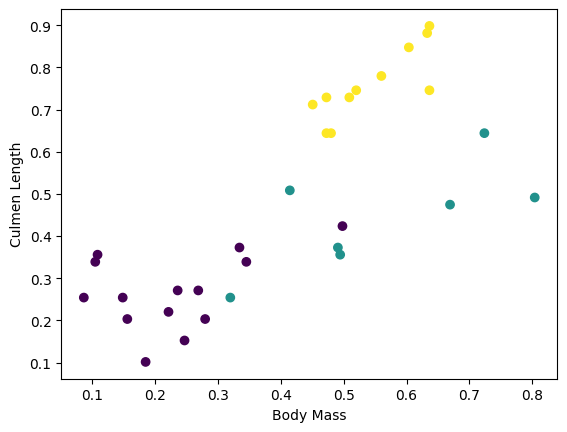

In [284]:
plt.scatter(features[:,0],
            features[:,2],
            c=labels,
            cmap='viridis')

plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()

## Construir un modelo lineal simple

### ¿Por qué un modelo?

Un *[modelo](https://developers.google.com/machine-learning/crash-course/glossary#model)* es una relación entre las características y la etiqueta. Para resolver el problema de clasificación de pingüinos, el modelo define la relación entre las medidas de masa corporal, aletas y culmen y la especie de pingüino predicha. Algunos modelos sencillos pueden describirse con unas pocas líneas de álgebra, pero los modelos complejos de aprendizaje automático tienen un gran número de parámetros que son difíciles de resumir.

¿Podría determinar la relación entre las cuatro características y la especie de pingüino *sin* usar el aprendizaje automático? Es decir, ¿podría usar técnicas de programación tradicionales (por ejemplo, muchas sentencias condicionales) para crear un modelo? Tal vez, si analizara el conjunto de datos el tiempo suficiente para determinar las relaciones entre la masa corporal y las medidas del culmen con una especie concreta. Y esto se hace difícil (quizá imposible) en conjuntos de datos más complicados. Un buen enfoque de aprendizaje automático *determina el modelo por usted*. Si le da suficientes ejemplos representativos al tipo de modelo de aprendizaje automático adecuado, el programa determina las relaciones por usted.

### Elegir el modelo

Después tiene que elegir el tipo de modelo que va a entrenar. Hay muchos tipos de modelos y elegir uno bueno requiere experiencia. Este tutorial usa una red neuronal para resolver el problema de clasificación de pingüinos. [*Las redes neuronales*](https://developers.google.com/machine-learning/glossary/#neural_network) pueden encontrar relaciones complejas entre las características y la etiqueta. Se trata de un grafo muy estructurado, organizado en una o varias [*capas ocultas*](https://developers.google.com/machine-learning/glossary/#hidden_layer). Cada capa oculta está formada por una o más [*neuronas*](https://developers.google.com/machine-learning/glossary/#neuron). Existen varias categorías de redes neuronales y este programa usa una red neuronal densa, o [*completamente conectada*](https://developers.google.com/machine-learning/glossary/#fully_connected_layer): las neuronas de una capa reciben conexiones de entrada de *cada* neurona de la capa anterior. Por ejemplo, la figura 2 ilustra una red neuronal densa formada por una capa de entrada, dos capas ocultas y una capa de salida:

<table>
  <tr><td>     <img src="https://www.tensorflow.org/tutorials/customization/images/full_network_penguin.png" class="no-filter" alt="Diagrama de la arquitectura de la red: Entradas, 2 capas ocultas y salidas"> </td></tr>
  <tr><td align="center">     <b>Figura 2.</b> Una red neuronal con características, capas ocultas y predicciones.<br> </td></tr>
</table>

Cuando entrena el modelo de la Figura 2 y lo alimenta con un ejemplo sin etiquetar, produce tres predicciones: la probabilidad de que este pingüino sea de la especie dada. Esta predicción se llama [*inferencia*](https://developers.google.com/machine-learning/crash-course/glossary#inference). En este ejemplo, la suma de las predicciones de salida es 1.0. En la Figura 2, esta predicción se desglosa como `0.02` para la especie *de Adelia*, `0.95` para la especie *barbijo*, y `0.03` para la especie *gentú*. Esto significa que el modelo predice (con un 95 % de probabilidad) que un pingüino de ejemplo no etiquetado es un *pingüino Barbijo*.

### Crear un modelo usando Keras

La API TensorFlow `tf.keras` es la forma preferida de crear modelos y capas. Esto facilita la creación de modelos y la experimentación, a la vez que Keras se encarga de la complejidad de conectarlo todo.

El modelo `tf.keras.Sequential` es una pila lineal de capas. Su constructor toma una lista de instancias de capas, en este caso, dos capas `tf.keras.layers.Dense` con 10 nodos cada una, y una capa de salida con 3 nodos para representar sus predicciones de etiquetas. El parámetro `input_shape` de la primera capa corresponde al número de características del conjunto de datos, y es obligatorio:

In [285]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3)
])

c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


La [*función de activación*](https://developers.google.com/machine-learning/crash-course/glossary#activation_function) determina la forma de salida de cada nodo de la capa. Estas no linealidades son importantes: sin ellas, el modelo sería equivalente a una sola capa. Hay muchas `tf.keras.activations`, pero para las capas ocultas es común usar [ReLU](https://developers.google.com/machine-learning/crash-course/glossary#ReLU).

La cantidad ideal de capas ocultas y neuronas varía en función del problema y del conjunto de datos. Igual que muchos aspectos del aprendizaje automático, se requiere una mezcla de conocimientos y experimentación para elegir la mejor forma de la red neuronal. Como regla general, aumentar el número de capas ocultas y neuronas suele crear un modelo más potente, que requiere más datos para entrenarse eficazmente.

### Usar el modelo

Veamos rápidamente lo que hace este modelo con un lote de funciones:

In [286]:
predictions = model(features)
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.544, -0.058, -0.901],
       [ 0.622, -0.185, -0.943],
       [ 0.77 , -0.073, -1.275],
       [ 0.44 , -0.048, -0.727],
       [ 0.439, -0.061, -0.727]], dtype=float32)>

Aquí, cada ejemplo devuelve un [logit](https://developers.google.com/machine-learning/crash-course/glossary#logits) para cada clase.

Para convertir estos logits en una probabilidad para cada clase, use la función [softmax](https://developers.google.com/machine-learning/crash-course/glossary#softmax):

In [287]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.561, 0.307, 0.132],
       [0.604, 0.269, 0.126],
       [0.641, 0.276, 0.083],
       [0.519, 0.319, 0.162],
       [0.521, 0.316, 0.162]], dtype=float32)>

Si se toma el `tf.math.argmax` entre las clases, obtenemos el índice de clase predicho. Pero el modelo aún no se ha entrenado, así que no son buenas predicciones:

In [288]:
print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


## Entrenar el modelo

El [*entrenamiento*](https://developers.google.com/machine-learning/crash-course/glossary#training) es la fase del aprendizaje automático en la que el modelo se optimiza gradualmente, es decir, el modelo *aprende* el conjunto de datos. La meta es que aprenda lo suficiente sobre la estructura del conjunto de datos de entrenamiento para hacer predicciones sobre datos que no haya visto. Si aprende *demasiado* sobre el conjunto de datos de entrenamiento, las predicciones sólo funcionarán para los datos que haya visto y no serán generalizables. Este problema se llama [*sobreajuste*](https://developers.google.com/machine-learning/crash-course/glossary#overfitting): es como memorizar las respuestas en lugar de comprender cómo resolver un problema.

El problema de clasificación de pingüinos es un ejemplo de [*aprendizaje automático supervisado*](https://developers.google.com/machine-learning/glossary/#supervised_machine_learning): el modelo se entrena a partir de ejemplos que contienen etiquetas. En el [*aprendizaje automático no supervisado*](https://developers.google.com/machine-learning/glossary/#unsupervised_machine_learning), los ejemplos no contienen etiquetas. En su lugar, el modelo suele encontrar patrones entre las características.

### Definir la pérdida y la función de gradientes

Tanto en la fase de entrenamiento como en la de evaluación hay que calcular la [*pérdida*](https://developers.google.com/machine-learning/crash-course/glossary#loss) del modelo. Esto mide lo alejadas que están las predicciones de un modelo de la etiqueta deseada, en otras palabras, lo mal que funciona el modelo. Se desea minimizar, u optimizar, este valor.

Su modelo calculará su pérdida usando la función `tf.keras.losses.SparseCategoricalCrossentropy` que toma las predicciones de probabilidad de clase del modelo y la etiqueta deseada, y devuelve la pérdida media en todos los ejemplos.

In [289]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [290]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.3589904308319092


Use el contexto `tf.GradientTape` para calcular los [*gradientes*](https://developers.google.com/machine-learning/crash-course/glossary#gradient) usados para optimizar su modelo:

In [291]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

### Crear un optimizador

Un [*optimizador*](https://developers.google.com/machine-learning/crash-course/glossary#optimizer) aplica los gradientes calculados a los parámetros del modelo para minimizar la función `loss`. Imagine la función loss como una superficie curva (vea la Figura 3) y quiere encontrar su punto más bajo andando a su alrededor. Los gradientes apuntan en la dirección del ascenso más pronunciado, así que se desplazará en sentido contrario y bajará por la colina. Calculando iterativamente la pérdida y el gradiente para cada lote, ajustará el modelo durante el entrenamiento. Gradualmente, el modelo encontrará la mejor combinación de ponderaciones y sesgo para minimizar la pérdida. Y cuanto menor sea la pérdida, mejores serán las predicciones del modelo.

<table>
  <tr><td>     <img src="https://cs231n.github.io/assets/nn3/opt1.gif" width="70%" alt="Algoritmos de optimización visualizados en el tiempo en un espacio 3D."> </td></tr>
  <tr><td align="center">     <b>Figura 3.</b> Algoritmos de optimización visualizados en el tiempo en un espacio 3D.<br>(Fuente: <a href="http://cs231n.github.io/neural-networks-3/">Stanford class CS231n</a>, licencia del MIT, Créditos de imagen: <a href="https://twitter.com/alecrad">Alec Radford</a>)</td></tr>
</table>

TensorFlow tiene muchos algoritmos de optimización disponibles para el entrenamiento. En este tutorial, usará `tf.keras.optimizers.SGD` que implementa el algoritmo [*descenso de gradiente estocástico*](https://developers.google.com/machine-learning/crash-course/glossary#gradient_descent) (SGD). El parámetro `learning_rate` fija el tamaño del paso que hay que dar en cada iteración cuesta abajo. Esta tasa es un [*hiperparámetro*](https://developers.google.com/machine-learning/glossary/#hyperparameter) que deberá ajustar habitualmente para obtener mejores resultados.

Instancie el optimizador con una [*velocidad de aprendizaje*](https://developers.google.com/machine-learning/glossary#learning-rate) de `0.01`, un valor escalar que se multiplica por el gradiente en cada iteración del entrenamiento:

In [292]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

A continuación, use este objeto para calcular un único paso de optimización:

In [293]:
loss_value, grads = grad(model, features, labels)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value.numpy()))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 0, Initial Loss: 1.3589904308319092
Step: 1,         Loss: 1.3416416645050049


### Bucle de entrenamiento

Con todas las piezas en su sitio, ¡el modelo está listo para ser entrenado! Un bucle de entrenamiento alimenta el modelo con los ejemplos del conjunto de datos para ayudarle a hacer mejores predicciones. El siguiente bloque de código establece estos pasos de entrenamiento:

1. Itere cada *epoca*. Una época es una pasada por el conjunto de datos.
2. Dentro de una época, itere sobre cada ejemplo del `Dataset` de entrenamiento tomando sus *características* (`x`) y *etiqueta* (`y`).
3. Usando las características del ejemplo, haga una predicción y compárela con la etiqueta. Mida la inexactitud de la predicción y úsela para calcular la pérdida y los gradientes del modelo.
4. Use un `optimizer` para actualizar los parámetros del modelo.
5. Conserve algunas estadísticas para visualizarlas.
6. Repítalo para cada época.

La variable `num_epochs` es el número de veces que se repite el bucle sobre la colección de conjuntos de datos. En el siguiente código, `num_epochs` se fija en 201, lo que significa que este bucle de entrenamiento se ejecutará 201 veces. Aunque parezca contradictorio, entrenar un modelo durante más tiempo no garantiza un mejor modelo. `num_epochs` es un [*hiperparámetro*](https://developers.google.com/machine-learning/glossary/#hyperparameter) que puede ajustar. Seleccionar el número adecuado suele requerir experiencia y experimentación:

In [294]:
## Note: Rerunning this cell uses the same model parameters

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 201

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 50 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.301, Accuracy: 44.944%
Epoch 050: Loss: 0.775, Accuracy: 80.150%
Epoch 100: Loss: 0.468, Accuracy: 80.524%
Epoch 150: Loss: 0.309, Accuracy: 89.139%
Epoch 200: Loss: 0.197, Accuracy: 96.255%


También puede usar el método incorporado [`Model.fit(ds_train_batch)`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) de Keras para entrenar su modelo. 

### Ver la función de pérdida en el tiempo

Aunque es útil imprimir el progreso del entrenamiento del modelo, puede visualizarlo con [TensorBoard](https://www.tensorflow.org/tensorboard), una herramienta de visualización y métricas que viene incluida con TensorFlow. Para este sencillo ejemplo, usará el módulo `matplotlib` para crear gráficos básicos.

Hay que aprender a interpretar estos gráficos, pero en general lo que se desea es que disminuya la *pérdida* y aumente la *precisión*:

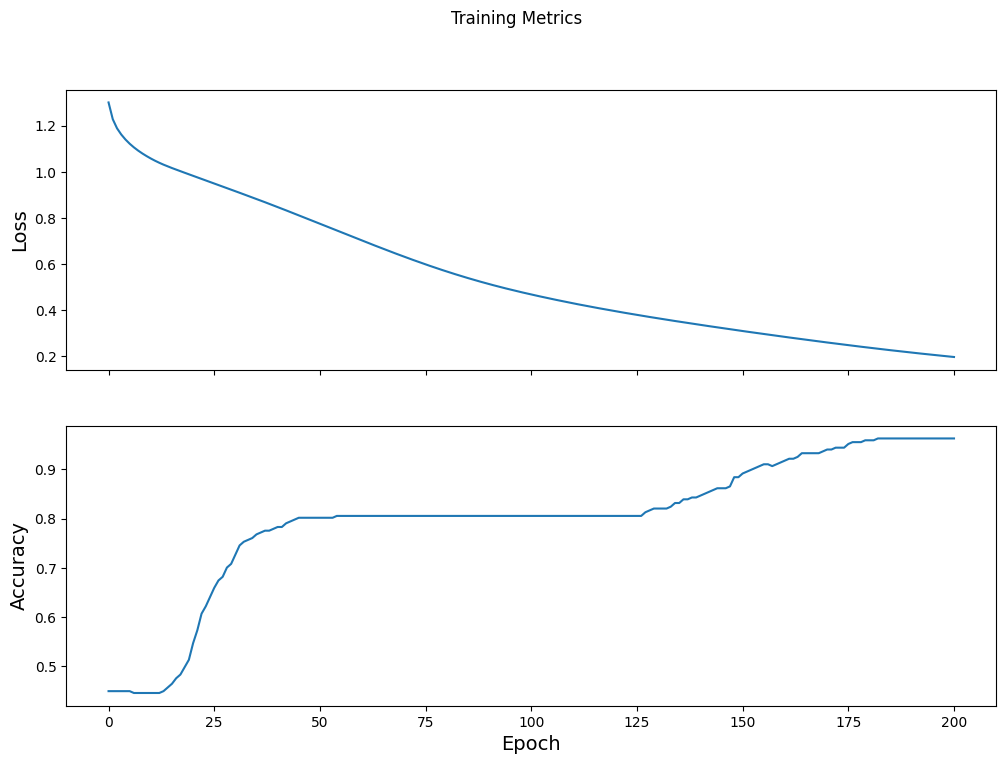

In [295]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

## Evaluar la eficacia del modelo

Ahora que el modelo está entrenado, puede sacar algunas estadísticas sobre su rendimiento.

*Evaluar* significa determinar la eficacia del modelo a la hora de hacer predicciones. Para determinar la eficacia del modelo en la clasificación de pingüinos, pásele algunas mediciones y pídale que prediga qué especie de pingüino representan. Luego compare sus predicciones con la etiqueta real. Por ejemplo, un modelo que eligió la especie correcta en la mitad de los ejemplos de entrada tiene una [*precisión*](https://developers.google.com/machine-learning/glossary/#accuracy) de `0.5`. La figura 4 muestra un modelo ligeramente más eficaz, que acierta 4 de cada 5 predicciones con una precisión del 80%:

<table cellpadding="8" border="0">
  <colgroup>
    <col span="4">
    <col span="1" bgcolor="lightblue">
    <col span="1" bgcolor="lightgreen">
  </colgroup>
  <tr bgcolor="lightgray">
    <th colspan="4">Características de ejemplo</th>
    <th colspan="1">Etiqueta</th>
    <th colspan="1">Predicción del modelo</th>
  </tr>
  <tr>
    <td>5.9</td>
<td>3.0</td>
<td>4.3</td>
<td>1.5</td>
<td align="center">1</td>
<td align="center">1</td>
  </tr>
  <tr>
    <td>6.9</td>
<td>3.1</td>
<td>5.4</td>
<td>2.1</td>
<td align="center">2</td>
<td align="center">2</td>
  </tr>
  <tr>
    <td>5.1</td>
<td>3.3</td>
<td>1.7</td>
<td>0.5</td>
<td align="center">0</td>
<td align="center">0</td>
  </tr>
  <tr>
    <td>6.0</td> <td>3.4</td> <td>4.5</td> <td>1.6</td> <td align="center">1</td>
<td align="center" bgcolor="red">2</td>
  </tr>
  <tr>
    <td>5.5</td>
<td>2.5</td>
<td>4.0</td>
<td>1.3</td>
<td align="center">1</td>
<td align="center">1</td>
  </tr>
  <tr><td align="center" colspan="6">     <b>Figura 4.</b> Un clasificador de pingüinos con un 80% de precisión.<br> </td></tr>
</table>

### Configurar el conjunto de pruebas

Evaluar el modelo es similar a entrenarlo. La mayor diferencia es que los ejemplos vienen de un *[conjunto de prueba](https://developers.google.com/machine-learning/crash-course/glossary#test_set)* distinto del conjunto de entrenamiento. Si quiere evaluar correctamente la eficacia de un modelo, los ejemplos usados para evaluarlo deben ser distintos de los usados para entrenarlo.

El conjunto de datos de pingüinos no tiene un conjunto de datos de prueba separado, así que, en la sección anterior Descargar el conjunto de datos, divida el conjunto de datos original en conjuntos de datos de prueba y de entrenamiento. Use el conjunto de datos `ds_test_batch` para la evaluación.

### Evaluar el modelo en el conjunto de datos de prueba

A diferencia de la etapa de entrenamiento, el modelo sólo evalúa una única [época](https://developers.google.com/machine-learning/glossary/#epoch) de los datos de prueba. El código siguiente itera sobre cada ejemplo del conjunto de prueba y compara la predicción del modelo con la etiqueta real. Esta comparación se usa para medir la precisión del modelo en todo el conjunto de pruebas:

In [296]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 97.015%


También puede usar la función `model.evaluate(ds_test, return_dict=True)` de keras para conseguir información de qué tan preciso es su conjunto de datos de prueba. 

Al inspeccionar el último lote, por ejemplo, puede ver que las predicciones del modelo suelen ser correctas.


In [297]:
tf.stack([y,prediction],axis=1)

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 1],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 1],
       [2, 2],
       [0, 0]])>

## Usar el modelo entrenado para hacer predicciones

Ha entrenado un modelo y "demostrado" que es bueno (pero no perfecto) para clasificar las especies de pingüinos. Ahora vamos a usar el modelo entrenado para hacer algunas predicciones con [*ejemplos sin etiquetar*](https://developers.google.com/machine-learning/glossary/#unlabeled_example); es decir, con ejemplos que tienen características pero no etiquetas.

En la vida real, los ejemplos sin etiquetar pueden venir de muchas fuentes distintas, como apps, archivos CSV y fuentes de datos. Para este tutorial, le damos manualmente tres ejemplos sin etiquetar para predecir sus etiquetas. Recuerde que los números de etiqueta se mapean en una representación con nombre como:

- `0`: pingüino de Adelia
- `1`: pingüino barbijo
- `2`: pingüino gentú

In [298]:
predict_dataset = tf.convert_to_tensor([
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adélie (85.7%)
Example 1 prediction: Gentoo (96.8%)
Example 2 prediction: Chinstrap (74.2%)


# Carga y procesamiento de imágenes

En este tutorial se muestra cómo cargar y preprocesar un conjunto de datos de imágenes de tres formas:

- Primero, usarás las utilidades de preprocesamiento de alto nivel de Keras (como `tf.keras.utils.image_dataset_from_directory`) y capas (como `tf.keras.layers.Rescaling`) para leer un directorio de imágenes en un disco.
- Luego, escribirá su propia canalización de entrada desde cero [con tf.data](../../guide/data.ipynb).
- Por último, descargará un conjunto de datos de un [catálogo](https://www.tensorflow.org/datasets/catalog/overview) más grande que está disponible en [TensorFlow Datasets](https://www.tensorflow.org/datasets).

## Preparación

In [299]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [300]:
print(tf.__version__)

2.19.0


### Descargar el conjunto de datos de flores

Este tutorial usa un conjunto de datos de miles de fotos de flores. El conjunto de datos de flores contiene cinco subdirectorios, uno por clase.

```
flowers_photos/
  daisy/
  dandelion/
  roses/
  sunflowers/
  tulips/
```

Nota: todas las imágenes son licencia de CC-BY, los creadores están en el archivo LICENSE.txt.

In [301]:
import tensorflow as tf
import pathlib

# Descargar y extraer el dataset en el directorio actual
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True, cache_dir=".")

# Ajustar la ruta al directorio extraído
data_dir = pathlib.Path(archive).with_suffix('.tgz') / "flower_photos"
print (data_dir)

datasets\flower_photos.tgz\flower_photos


Después de la descarga (218MB), debería tener una copia disponible de las fotos de flores. Son 3670 imágenes en total.

In [302]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


Cada directorio contiene imágenes de ese tipo de flor. Estas son algunas rosas:

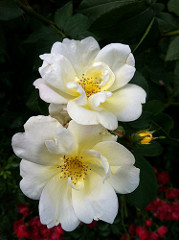

In [303]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

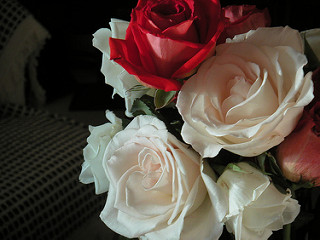

In [304]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[1]))

## Cargar datos con una utilidad de Keras

Carguemos estas imágenes fuera del disco con la utilidad `tf.keras.utils.image_dataset_from_directory` que es muy útil.

### Crear un conjunto de datos

Defina algunos parámetros para el cargador:

In [305]:
batch_size = 32
img_height = 180
img_width = 180

Se considera buena práctica usar un separador de validación al desarrollar el modelo. El 80 % de las imágenes las usará para entrenamiento y el 20 % para validación.

In [306]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [307]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


En estos conjuntos de datos, puede encontrar los nombres de clase en el atributo `class_names`.

In [308]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### Visualizar los datos

Aquí están las primeras nueve imágenes del conjunto de datos para entrenamiento.

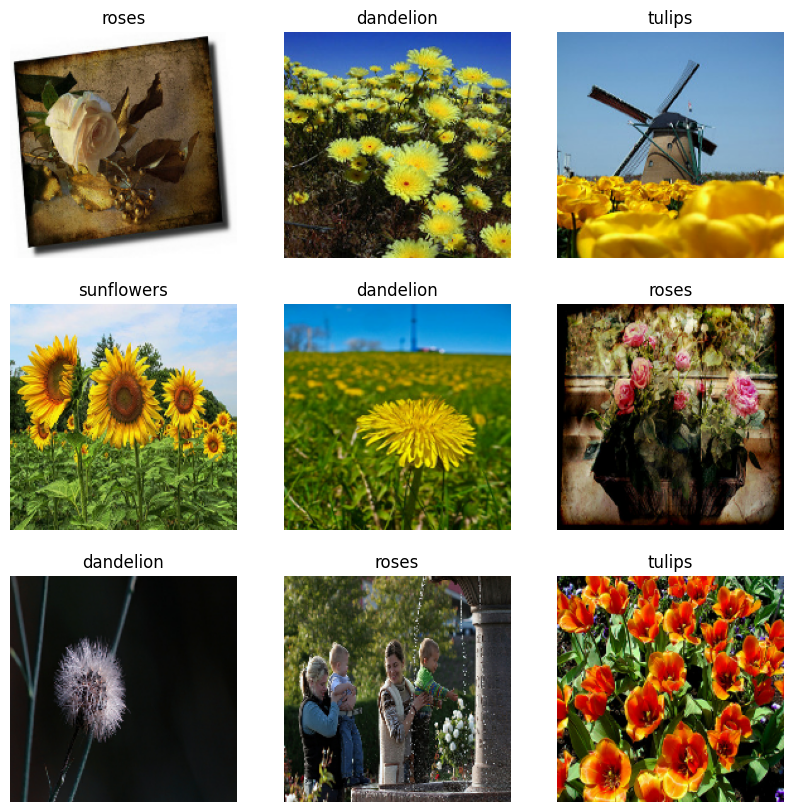

In [309]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Puede entrenar un modelo con estos conjuntos de datos al pasarlos a `model.fit` (lo veremos más adelante). Si quiere, también puede iterar manualmente por los conjuntos de datos y recuperar lotes de imágenes.

In [310]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


El lote de imagen `image_batch` es un tensor de la forma `(32, 180, 180, 3)`. Esto es un lote de 32 imágenes de forma `180x180x3` (la última dimensión hace referencia a los canales de color RGB). El lote `label_batch` es un tensor de la forma `(32,)`, estas son etiquetas que concuerdan con las 32 imágenes.

Se puede llamar a `.numpy()` en cualquiera de estos tensores para convertirlos en `numpy.ndarray`.

### Estandarizar los datos


Los valores del canal RGB están dentro del rango `[0, 255]`, lo cual no es ideal para una red neuronal. En general, debería buscar que los valores de su entrada sean bajos.

Aquí, estandarizará los valores para que estén dentro del rango `[0, 1]` mediante el uso de `tf.keras.layers.Rescaling`:

In [311]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

Esta capa se puede usar de dos formas. Se puede aplicar en el conjunto de datos llamando `Dataset.map`:

In [312]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.0 0.96902645


O, se puede incluir la capa en la definición de su modelo para simplificar la implementación. Aquí se usará el segundo enfoque.

Nota: Si lo que quiere es escalar valores de píxeles a `[-1,1]` escriba `tf.keras.layers.Rescaling(1./127.5, offset=-1)` en su lugar

Nota: Previamente, usaste el argumento `image_size` de `tf.keras.utils.image_dataset_from_directory` para ajustar el tamaño de las imágenes. Si también quiere incluir la lógica del ajuste en su modelo, puede usar la capa `tf.keras.layers.Resizing`.

### Configurar el conjunto de datos para rendimiento

Vamos a asegurarnos de usar una preextracción almacenada en el búfer para que pueda producir datos desde el disco sin provocar un bloqueo en la E/S. Hay dos métodos importantes que deberías usar al cargar datos:

- `Dataset.cache` conserva los datos en la memoria después de que se carga desde el disco durante la primera época. Así se garantiza que el conjunto de datos no se transforme en un cuello de botella mientras entrena su modelo. Si su conjunto de datos es muy grande para guardar en la memoria, también puede usar este método para crear un caché en disco de alto rendimiento.
- `Dataset.prefetch` superpone el preprocesamiento de los datos y la ejecución del modelo durante el entrenamiento.

Quienes quieran aprender más sobre ambos modelos y también sobre cómo copiar datos en caché en disco, pueden leer la sección *Preextracción* de la guía [Mejor rendimiento con la API tf.data](../../guide/data_performance.ipynb).

In [313]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Entrenar un modelo

Para completar el tutorial, deberá mostrar cómo entrenar un modelo simple con los conjuntos de datos que acaba de preparar.

El modelo [Sequential](https://www.tensorflow.org/guide/keras/sequential_model) consiste en tres bloques de convolución (`tf.keras.layers.Conv2D`) con una capa de agrupación máxima (`tf.keras.layers.MaxPooling2D`) en cada uno de ellos. Hay una capa totalmente conectada (`tf.keras.layers.Dense`) con 128 unidades más que se activa con una función de activación de ReLU (`'relu'`). El modelo no tiene ningún ajuste, el objetivo es mostrarle los mecanismos con los conjuntos de datos que usted acaba de crear. Para aprender más sobre la clasificación de imágenes, vea el tutorial de [Clasificación de imágenes](../images/classification.ipynb).

In [314]:
num_classes = 5

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

Escoja el optimizador `tf.keras.optimizers.Adam` y la función de pérdida `tf.keras.losses.SparseCategoricalCrossentropy`. Para ver la precisión de entrenamiento y validación de cada época de entrenamiento, realice una pasada del argumento de `métricas` en `Model.compile`.

In [315]:

# Compila con:
# - Optimizer: Adam
# - Métrica: accuracy
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

Nota: Solo lo entrenará para algunas épocas para que el tutorial se ejecute rápido. 

In [316]:
model.fit(
  train_ds,
  validation_data=val_ds,
)

92/92 ━━━━━━━━━━━━━━━━━━━━ 29s 288ms/step - accuracy: 0.3443 - loss: 1.4744 - val_accuracy: 0.5368 - val_loss: 1.1079


Nota: También puede escribir un bucle de entrenamiento personalizado en vez de usar `Model.fit`. Para más información, visite el tutorial de [Escribir un bucle desde cero](https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch).

Quizás notará que la precisión de la validación es baja en comparación con la precisión del entrenamiento, esto quiere decir que su modelo está sobreajustado. Puede obtener más información sobre sobrejuste y sobre cómo reducirlo en este [tutorial](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).

## El uso de tf.data para control más preciso

La utilidad de preprocesamiento de Keras mencionada anteriormente, `tf.keras.utils.image_dataset_from_directory`, es una forma conveniente de crear un `tf.data.Dataset` desde una directorio de imágenes.

Para control más preciso y específico, puede escribir su propia canalización de entrada con `tf.data`. En esta sección se muestra cómo hacerlo, empezando con las rutas de archivo del archivo TGZ que descargó antes.

In [317]:
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False)
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [318]:
for f in list_ds.take(5):
  print(f.numpy())

b'datasets\\flower_photos.tgz\\flower_photos\\sunflowers\\14646279002_9cdf97be97_n.jpg'
b'datasets\\flower_photos.tgz\\flower_photos\\dandelion\\16495282564_d8c34d6a2e_m.jpg'
b'datasets\\flower_photos.tgz\\flower_photos\\tulips\\8713357842_9964a93473_n.jpg'
b'datasets\\flower_photos.tgz\\flower_photos\\dandelion\\18238604119_a5689980ee_n.jpg'
b'datasets\\flower_photos.tgz\\flower_photos\\roses\\5578760521_e54aca6bed_n.jpg'


La estructura de árbol de estos archivos puede usarse para compilar una lista `class_names`.

In [319]:
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != "LICENSE.txt"]))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


Divida los conjuntos de datos en conjuntos de entrenamiento y validación:

In [320]:
val_size = int(image_count * 0.2)
train_ds = list_ds.skip(val_size)
val_ds = list_ds.take(val_size)

Puede imprimir la longitud de cada conjunto de datos como se muestra a continuación:

In [321]:
print(tf.data.experimental.cardinality(train_ds).numpy())
print(tf.data.experimental.cardinality(val_ds).numpy())

2936
734


Escriba una función breve que convierta una ruta de archivo en una pareja `(img, label)`:

In [322]:
def get_label(file_path):
  # Convert the path to a list of path components
  parts = tf.strings.split(file_path, os.path.sep)
  # The second to last is the class-directory
  one_hot = parts[-2] == class_names
  # Integer encode the label
  return tf.argmax(one_hot)

In [323]:
def decode_img(img):
  # Convert the compressed string to a 3D uint8 tensor
  img = tf.io.decode_jpeg(img, channels=3)
  # Resize the image to the desired size
  return tf.image.resize(img, [img_height, img_width])

In [324]:
def process_path(file_path):
  label = get_label(file_path)
  # Load the raw data from the file as a string
  img = tf.io.read_file(file_path)
  img = decode_img(img)
  return img, label

Use `Dataset.map` para crear un conjunto de datos de parejas de `image, label`:

In [325]:
# Set `num_parallel_calls` so multiple images are loaded/processed in parallel.
train_ds = train_ds.map(process_path, num_parallel_calls=AUTOTUNE)
val_ds = val_ds.map(process_path, num_parallel_calls=AUTOTUNE)

In [326]:
for image, label in train_ds.take(1):
  print("Image shape: ", image.numpy().shape)
  print("Label: ", label.numpy())

Image shape:  (180, 180, 3)
Label:  0


### Configurar conjuntos de datos para rendimiento

Para entrenar un modelo con este conjunto de datos, necesita que los datos:

- Estén en orden aleatorio.
- Estén en lotes.
- Que los lotes estén disponibles lo antes posible.

Se pueden agregar estas características con la API `tf.data`. Para más información, lea la guía [Input Pipeline Performance](../../guide/performance/datasets.ipynb).

In [327]:
def configure_for_performance(ds):
  ds = ds.cache()
  ds = ds.shuffle(buffer_size=1000)
  ds = ds.batch(batch_size)
  ds = ds.prefetch(buffer_size=AUTOTUNE)
  return ds

train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)

### Visualizar los datos

Puede visualizar estos conjuntos de datos de forma similar a como lo hizo previamente:

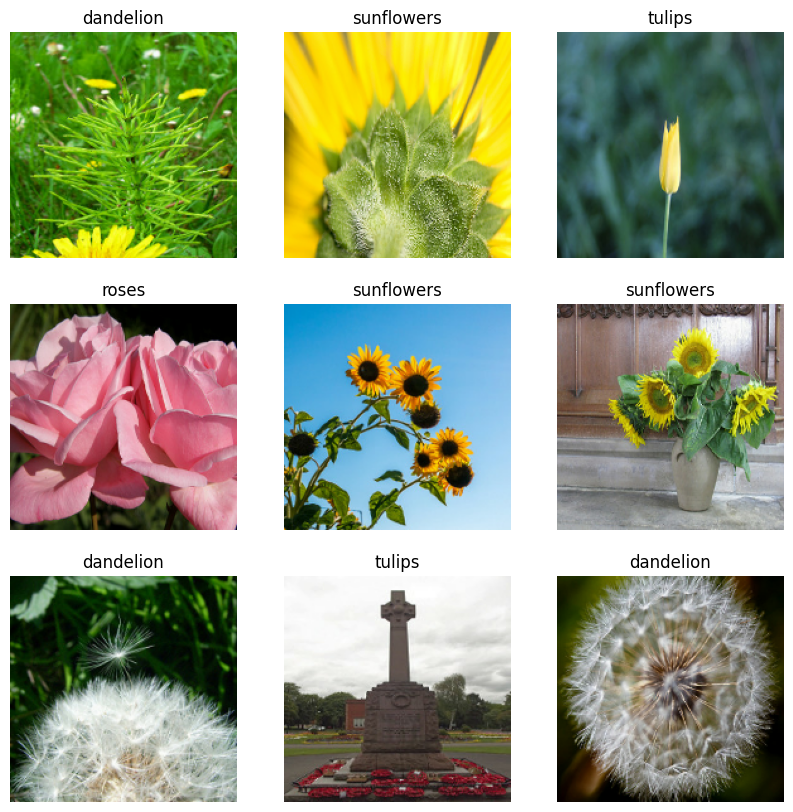

In [328]:
image_batch, label_batch = next(iter(train_ds))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  label = label_batch[i]
  plt.title(class_names[label])
  plt.axis("off")

### Continuar entrenando el modelo

Ahora ha construido un `tf.data.Dataset` parecido al de `tf.keras.utils.image_dataset_from_directory` anteriormente. Puede continuar entrenándolo con ese modelo. Igual que antes, solo lo entrenará para algunas épocas para que el tiempo de ejecución sea corto.

In [329]:
model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - accuracy: 0.5875 - loss: 1.0296 - val_accuracy: 0.6090 - val_loss: 0.9882
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.6405 - loss: 0.8933 - val_accuracy: 0.6608 - val_loss: 0.8754
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 25s 269ms/step - accuracy: 0.7465 - loss: 0.6931 - val_accuracy: 0.6431 - val_loss: 0.9565


## El uso de TensorFlow Datasets

Por ahora, este tutorial solo se ha enfocado en cargar datos fuera del disco. También puede encontrar conjuntos de datos para usar si explora el gran [catálogo](https://www.tensorflow.org/datasets/catalog/overview) de conjuntos de datos de fácil descarga en  [TensorFlow Datasets](https://www.tensorflow.org/datasets).

Previamente, ya cargó el conjunto de datos de flores fuera del disco, ahora lo vamos a importar con TensorFlow Datasets.

Descargue el [conjunto de datos](https://www.tensorflow.org/datasets/catalog/tf_flowers) de flores con TensorFlow Datasets:

In [330]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'tf_flowers',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

El conjunto de datos de flores tiene cinco clases:

In [331]:
num_classes = metadata.features['label'].num_classes
print(num_classes)

5


Recupere una imagen del conjunto de datos:

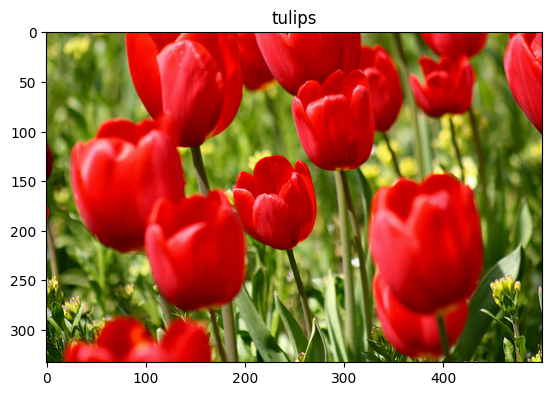

In [332]:
get_label_name = metadata.features['label'].int2str

image, label = next(iter(train_ds))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

Igual que antes, recuerde que los conjuntos de entrenamiento, validación y prueba deben estar en lotes, en orden aleatorio y configurados para buen rendimiento:

In [333]:
train_ds = configure_for_performance(train_ds)
val_ds = configure_for_performance(val_ds)
test_ds = configure_for_performance(test_ds)

Puede encontrar un ejemplo completo que usa el conjunto de datos de flores y TensorFlow Datasets en el tutorial de [Aumento de datos](../images/data_augmentation.ipynb).

# Neural Network Example

Build a 2-hidden layers fully connected neural network (a.k.a multilayer perceptron) with TensorFlow v2.

This example is using a low-level approach to better understand all mechanics behind building neural networks and the training process.

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>

## MNIST Dataset Overview

This example is using MNIST handwritten digits. The dataset contains 60,000 examples for training and 10,000 examples for testing. The digits have been size-normalized and centered in a fixed-size image (28x28 pixels) with values from 0 to 255. 

In this example, each image will be converted to float32, normalized to [0, 1] and flattened to a 1-D array of 784 features (28*28).

![MNIST Dataset](http://neuralnetworksanddeeplearning.com/images/mnist_100_digits.png)

More info: http://yann.lecun.com/exdb/mnist/

In [334]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow.keras import Model, layers
import numpy as np

In [335]:
# MNIST dataset parameters.
num_classes = 10 # total classes (0-9 digits).
num_features = 784 # data features (img shape: 28*28).

# Training parameters.
learning_rate = 0.1
training_steps = 2000
batch_size = 256
display_step = 100

# Network parameters.
n_hidden_1 = 128 # 1st layer number of neurons.
n_hidden_2 = 256 # 2nd layer number of neurons.

In [336]:
# Prepare MNIST data.
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# Convert to float32.
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)
# Flatten images to 1-D vector of 784 features (28*28).
x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])
# Normalize images value from [0, 255] to [0, 1].
x_train, x_test = x_train / 255., x_test / 255.

In [337]:
# Use tf.data API to shuffle and batch data.
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [338]:
# Create TF Model.
class NeuralNet(Model):
    # Set layers.
    def __init__(self):
        super(NeuralNet, self).__init__()
        # First fully-connected hidden layer.
        self.fc1 = layers.Dense(n_hidden_1, activation=tf.nn.relu)
        # First fully-connected hidden layer.
        self.fc2 = layers.Dense(n_hidden_2, activation=tf.nn.relu)
        # Second fully-connecter hidden layer.
        self.out = layers.Dense(num_classes)

    # Set forward pass.
    def call(self, x, is_training=False):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.out(x)
        if not is_training:
            # tf cross entropy expect logits without softmax, so only
            # apply softmax when not training.
            x = tf.nn.softmax(x)
        return x

# Build neural network model.
neural_net = NeuralNet()

In [339]:
# Cross-Entropy Loss.
# Note that this will apply 'softmax' to the logits.
def cross_entropy_loss(x, y):
    # Convert labels to int 64 for tf cross-entropy function.
    y = tf.cast(y, tf.int64)
    # Apply softmax to logits and compute cross-entropy.
    loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=x)
    # Average loss across the batch.
    return tf.reduce_mean(loss)

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [340]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        # Forward pass.
        pred = neural_net(x, is_training=True)
        # Compute loss.
        loss = cross_entropy_loss(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = neural_net.trainable_variables

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

In [341]:
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x, is_training=True)
        loss = cross_entropy_loss(pred, batch_y)
        acc = accuracy(pred, batch_y)
        print("step: %i, loss: %f, accuracy: %f" % (step, loss, acc))

step: 100, loss: 0.375335, accuracy: 0.898438
step: 200, loss: 0.282724, accuracy: 0.910156
step: 300, loss: 0.348890, accuracy: 0.898438
step: 400, loss: 0.186591, accuracy: 0.949219
step: 500, loss: 0.270841, accuracy: 0.929688
step: 600, loss: 0.167154, accuracy: 0.937500
step: 700, loss: 0.118410, accuracy: 0.964844
step: 800, loss: 0.282658, accuracy: 0.929688
step: 900, loss: 0.159530, accuracy: 0.964844
step: 1000, loss: 0.150146, accuracy: 0.960938
step: 1100, loss: 0.152085, accuracy: 0.941406
step: 1200, loss: 0.110767, accuracy: 0.960938
step: 1300, loss: 0.092228, accuracy: 0.972656
step: 1400, loss: 0.094780, accuracy: 0.980469
step: 1500, loss: 0.150780, accuracy: 0.960938
step: 1600, loss: 0.126553, accuracy: 0.964844
step: 1700, loss: 0.091398, accuracy: 0.976562
step: 1800, loss: 0.143271, accuracy: 0.957031
step: 1900, loss: 0.072308, accuracy: 0.984375
step: 2000, loss: 0.085059, accuracy: 0.980469


In [342]:
# Test model on validation set.
pred = neural_net(x_test, is_training=False)
print("Test Accuracy: %f" % accuracy(pred, y_test))

Test Accuracy: 0.965600


In [343]:
# Visualize predictions.
import matplotlib.pyplot as plt

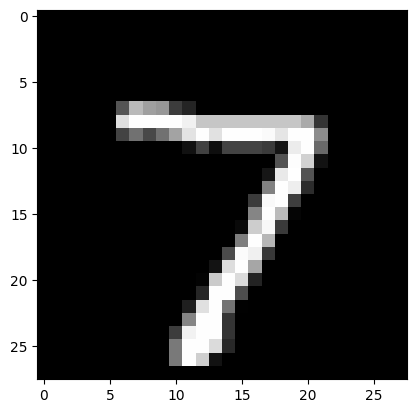

Model prediction: 7


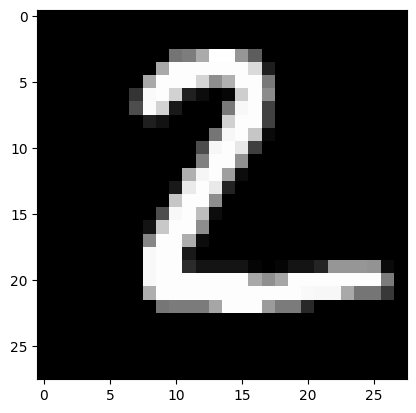

Model prediction: 2


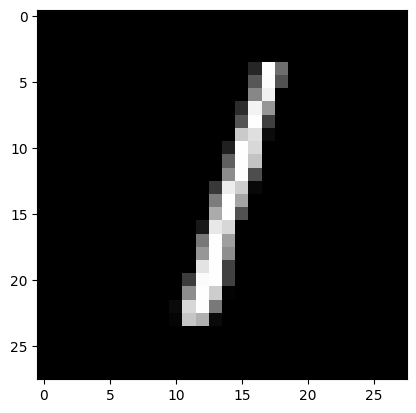

Model prediction: 1


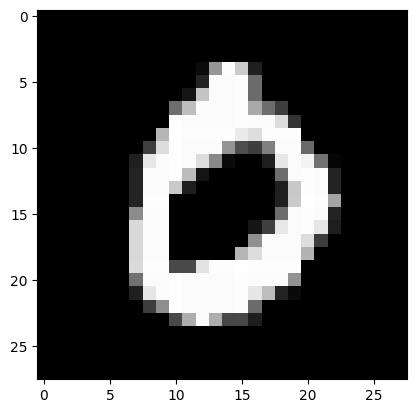

Model prediction: 0


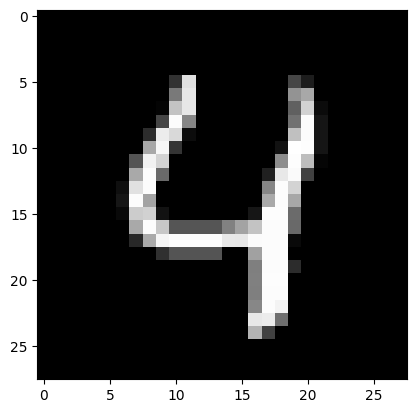

Model prediction: 4


In [344]:
# Predict 5 images from validation set.
n_images = 5
test_images = x_test[:n_images]
predictions = neural_net(test_images)

# Display image and model prediction.
for i in range(n_images):
    plt.imshow(np.reshape(test_images[i], [28, 28]), cmap='gray')
    plt.show()
    print("Model prediction: %i" % np.argmax(predictions.numpy()[i]))

# Guardar y cargar modelos

El progreso del modelo se puede guardar durante y después del entrenamiento. Esto significa que un modelo puede reanudarse donde quedó y, de este modo, evitar tiempos de entrenamiento prolongados. La posibilidad de guardar también implica que puede compartir su modelo y los demás pueden recrear su trabajo. A la hora de publicar modelos y técnicas de investigación, la mayoría de los profesionales del aprendizaje automático comparten lo siguiente:

- el código para crear el modelo, y
- los pesos entrenados, o parámetros, del modelo

Al compartir estos datos, se ayuda a los demás a comprender cómo funciona el modelo para que lo puedan probar por sí mismos con nuevos datos.

Precaución: Los modelos de TensorFlow están cifrados y es importante que tenga cuidado con los códigos que no sean confiables. Consulte [Usar TensorFlow de forma segura](https://github.com/tensorflow/tensorflow/blob/master/SECURITY.md) para obtener más información.

### Opciones

Existen distintas formas de guardar modelos de TensorFlow en función de la API que esté usando. Esta guía usa [tf.keras](https://www.tensorflow.org/guide/keras), una API de alto nivel que se usa para desarrollar y entrenar modelos en TensorFlow. Se recomienda el nuevo formato de alto nivel de `.keras` que se utiliza en este tutorial para guardar objetos de Keras, ya que ofrece un guardado sólido y eficiente basado en nombres que a menudo es más fácil de depurar que los formatos de bajo nivel o heredados. Para flujos de trabajo de guardado o serialización más avanzados, especialmente los que involucran objetos personalizados, consulte la [guía Guardar y cargar modelos de Keras](https://www.tensorflow.org/guide/keras/save_and_serialize). Por otros enfoques, consulte la [guía Usar el formato SavedModel](../../guide/saved_model.ipynb).

## Preparar

### Instalaciones e importaciones

Instale e importe TensorFlow y las dependencias:

In [345]:
!pip install pyyaml h5py  # Required to save models in HDF5 format


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


In [346]:
import os

import tensorflow as tf
from tensorflow import keras

print(tf.version.VERSION)

2.19.0


### Obtener un conjunto de datos de ejemplo

Usaremos el [conjunto de datos MNIST](http://yann.lecun.com/exdb/mnist/) para demostrar cómo guardar y cargar los pesos. Para acelerar estas ejecuciones, use los primeros 1000 ejemplos:

In [347]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

train_labels = train_labels[:1000]
test_labels = test_labels[:1000]

train_images = train_images[:1000].reshape(-1, 28 * 28) / 255.0
test_images = test_images[:1000].reshape(-1, 28 * 28) / 255.0

### Definir un modelo

Para comenzar, genere un modelo secuencial simple:

In [348]:
# Define a simple sequential model
def create_model():
  model = tf.keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
  ])

  model.compile(optimizer='adam',
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

  return model

# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

## Guardar puntos de verificación durante el entrenamiento

Puede usar un modelo entrenado sin necesidad de volver a entrenarlo o reanudar un entrenamiento donde lo dejó, en caso de que se haya interrumpido el proceso de entrenamiento. La retrollamada `tf.keras.callbacks.ModelCheckpoint` le permite guardar continuamente el modelo tanto *durante* el entrenamiento como *al final*.

### Uso de la retrollamada de punto de verificación

Cree una retrollamada  `tf.keras.callbacks.ModelCheckpoint` que guarde los pesos solo durante el entrenamiento:

In [354]:
checkpoint_path = "training_1/cp.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

# Train the model with the new callback
model.fit(train_images, 
          train_labels,  
          epochs=10,
          validation_data=(test_images, test_labels),
          callbacks=[cp_callback])  # Pass callback to training


# === ENTRENAMIENTO CON VALIDACIÓN ===
# Entrena el modelo con datos de validación
model.fit(
    train_images,
    train_labels,
    validation_data=(test_images, test_labels),
    epochs=10,
    callbacks=[cp_callback]
)

# This may generate warnings related to saving the state of the optimizer.
# These warnings (and similar warnings throughout this notebook)
# are in place to discourage outdated usage, and can be ignored.

Epoch 1/10
28/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000
Epoch 1: saving model to training_1/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0016 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4722 - val_sparse_categorical_accuracy: 0.8770
Epoch 2/10
26/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0018 - sparse_categorical_accuracy: 1.0000
Epoch 2: saving model to training_1/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0018 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4748 - val_sparse_categorical_accuracy: 0.8800
Epoch 3/10
24/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0017 - sparse_categorical_accuracy: 1.0000
Epoch 3: saving model to training_1/cp.weights.h5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0017 - sparse_categorical_accuracy: 1.0000 - val_loss: 0.4851 - val_sparse_categorical_accuracy: 0.8760
Epoch 4/10
27/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0012 - sparse_categ

Esta acción crea una única colección de archivos de puntos de verificación de TensorFlow que se actualiza al final de cada época:

In [355]:
os.listdir(checkpoint_dir)

['cp.weights.h5']

Siempre y cuando dos modelos compartan la misma arquitectura, podrá compartir los pesos entre ambos. Por lo tanto, al restaurar un modelo solo a partir de los pesos, cree un modelo con la misma arquitectura que el modelo original y, luego, configure sus pesos.

A continuación, vuelva a generar un modelo sin entrenar y evalúelo en el conjunto de prueba. Un modelo sin entrenar se ejecutará a niveles de azar (~10 % de precisión):

In [357]:
# Create a basic model instance
model = create_model()


# === EVALUACIÓN ===
# Evalúa el modelo con los datos de test
loss, acc =  model.evaluate(x_test, y_test, verbose=2)

print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 - 1s - 3ms/step - loss: 2.4100 - sparse_categorical_accuracy: 0.0789
Untrained model, accuracy:  7.89%


Luego, cargue los pesos del punto de verificación y vuelva a evaluar:

In [358]:
# Loads the weights
model.load_weights(checkpoint_path)

# === Re - EVALUACIÓN del modelo ===
# Evalúa el modelo con los datos de test
loss, acc = model.evaluate(test_images, test_labels, verbose=2)

print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

32/32 - 0s - 4ms/step - loss: 0.5072 - sparse_categorical_accuracy: 0.8770


c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Restored model, accuracy: 87.70%


### Opciones de la retrollamada de punto de verificación

La retrollamada ofrece varias opciones para otorgar nombres únicos a los puntos de verificación y ajustar la frecuencia de creación de puntos de verificación.

Entrene un nuevo modelo y guarde puntos de verificación con nombres únicos cada cinco épocas:

In [359]:
# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "training_1/cp-{epoch:04d}.weights.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Calculate the number of batches per epoch
import math
n_batches = len(train_images) / batch_size
n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path, 
    verbose=1, 
    save_weights_only=True,
    save_freq=5*n_batches)

# Create a new model instance
model = create_model()

# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

# Train the model with the new callback
model.fit(train_images, 
          train_labels,
          epochs=50, 
          batch_size=batch_size, 
          callbacks=[cp_callback],
          validation_data=(test_images, test_labels),
          verbose=0)

c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Epoch 5: saving model to training_1/cp-0005.weights.h5

Epoch 10: saving model to training_1/cp-0010.weights.h5

Epoch 15: saving model to training_1/cp-0015.weights.h5

Epoch 20: saving model to training_1/cp-0020.weights.h5

Epoch 25: saving model to training_1/cp-0025.weights.h5

Epoch 30: saving model to training_1/cp-0030.weights.h5

Epoch 35: saving model to training_1/cp-0035.weights.h5

Epoch 40: saving model to training_1/cp-0040.weights.h5

Epoch 45: saving model to training_1/cp-0045.weights.h5

Epoch 50: saving model to training_1/cp-0050.weights.h5


Ahora, revise los puntos de verificación resultantes y elija el último:

In [360]:
os.listdir(checkpoint_dir)

['cp-0000.weights.h5',
 'cp-0005.weights.h5',
 'cp-0010.weights.h5',
 'cp-0015.weights.h5',
 'cp-0020.weights.h5',
 'cp-0025.weights.h5',
 'cp-0030.weights.h5',
 'cp-0035.weights.h5',
 'cp-0040.weights.h5',
 'cp-0045.weights.h5',
 'cp-0050.weights.h5',
 'cp.weights.h5']

In [361]:
latest = tf.train.latest_checkpoint(checkpoint_dir)
latest

## Guardar el modelo completo

Llame `tf.keras.Model.save` para guardar la configuración de la arquitectura, los pesos y el entrenamiento de un modelo en un único archivo zip `model.keras`.

Se puede guardar un modelo completo en tres formatos de archivo diferentes (el nuevo formato `.keras` y dos formatos heredados: `SavedModel` y `HDF5`). Si guarda un modelo como `path/to/model.keras` se guarda automáticamente en el formato más reciente.

**Nota:** Para los objetos de Keras se recomienda usar el formato `.keras` de alto nivel, para guardar y recargar de forma más completa y basada en nombres, lo cual facilita la depuración. El formato SavedModel de bajo nivel y el formato H5 heredado aún son compatibles con el código existente.

Si desea cambiar al formato SavedModel, haga lo siguiente:

- Pase `save_format='tf'` a `save()`
- Pase un nombre de archivo sin extensión

Si desea cambiar al formato H5, haga lo siguiente:

- Pase `save_format='h5'` a `save()`
- Pase un nombre de archivo que termine en `.h5`

Guardar un modelo completamente funcional es muy útil, puede cargarlo en TensorFlow.js ([Saved Model](https://www.tensorflow.org/js/tutorials/conversion/import_saved_model), [HDF5](https://www.tensorflow.org/js/tutorials/conversion/import_keras)) y luego entrenarlo y ejecutarlo en navegadores web o convertirlo para ejecutarlo en dispositivos móviles mediante el uso de TensorFlow Lite ([Saved Model](https://www.tensorflow.org/lite/models/convert/#convert_a_savedmodel_recommended_), [HDF5](https://www.tensorflow.org/lite/models/convert/#convert_a_keras_model_))

*Los objetos personalizados (por ejemplo, los modelos o las capas subclasificados) requieren atención especial a la hora de guardarlos y cargarlos. Consulte la sección **Guardar objetos personalizados** que se describe más abajo.

### Nuevo formato `.keras` de alto nivel

El nuevo formato de guardado Keras v3, que se marca con la extensión `.keras`, es un formato más simple y eficiente que implementa un método de guardado basado en nombres, lo que le garantiza que lo que carga es exactamente lo que guardó, desde la perspectiva de Python. Esto simplifica mucho la tarea de depuración y constituye el formato recomendado para Keras.

La siguiente sección ilustra el método de guardado y restauración del modelo en el formato `.keras`.

In [362]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)


# Guarda el modelo completo en formato Keras
model.save('my_model.keras')


Epoch 1/5


c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.6131 - sparse_categorical_accuracy: 0.5035
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.4210 - sparse_categorical_accuracy: 0.8921
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3034 - sparse_categorical_accuracy: 0.9234
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2178 - sparse_categorical_accuracy: 0.9430
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1496 - sparse_categorical_accuracy: 0.9671


Vuelva a cargar un modelo Keras actualizado desde el archivo zip `.keras`:

In [363]:
new_model = tf.keras.models.load_model('my_model.keras')

# Show the model architecture
new_model.summary()

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_46 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

Intente ejecutar la evaluación y predecir con el modelo cargado:

In [364]:

# === EVALUACIÓN ===
# Evalúa el modelo con los datos de test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('Restored model, accuracy: {:5.2f}%'.format(100 * test_acc))

# === PREDICCIÓN ===
# Realiza una predicción con el modelo 

print(new_model.predict(test_images).shape)

32/32 - 1s - 17ms/step - loss: 0.4268 - sparse_categorical_accuracy: 0.8660
Restored model, accuracy: 86.60%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
(1000, 10)


El modelo restaurado se compila con los mismos argumentos que el modelo original. Intente ejecutar la evaluación y con el modelo cargado:

In [365]:
# Evaluate the restored model
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

print(new_model.predict(test_images).shape)

32/32 - 0s - 12ms/step - loss: 0.4268 - sparse_categorical_accuracy: 0.8660
Restored model, accuracy: 86.60%
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
(1000, 10)


### Formato HDF5

Keras ofrece un formato de guardado de alto nivel heredado básico que usa el estándar [HDF5](https://en.wikipedia.org/wiki/Hierarchical_Data_Format). 

In [366]:
# Create and train a new model instance.
model = create_model()
model.fit(train_images, train_labels, epochs=5)

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('my_model.h5') 

Epoch 1/5


c:\Users\34620\Documents\MASTER_AI\Gen_AI\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 1.5883 - sparse_categorical_accuracy: 0.5385
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4465 - sparse_categorical_accuracy: 0.8784
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2984 - sparse_categorical_accuracy: 0.9181
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2153 - sparse_categorical_accuracy: 0.9492
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1757 - sparse_categorical_accuracy: 0.9557


Ahora bien, recree el modelo a partir de ese archivo:

In [367]:
# Recreate the exact same model, including its weights and the optimizer
new_model = tf.keras.models.load_model('my_model.h5')

# Show the model architecture
new_model.summary()

Model: "sequential_24"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,052 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

Compruebe su precisión:

In [368]:
loss, acc = new_model.evaluate(test_images, test_labels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

32/32 - 0s - 14ms/step - loss: 0.4360 - sparse_categorical_accuracy: 0.8600
Restored model, accuracy: 86.00%


Keras guarda modelos mediante la inspección de sus arquitecturas. Esta técnica guarda todo:

- Los valores de peso
- La arquitectura del modelo
- La configuración de entrenamiento del modelo (lo que le pasa al método `.compile()`)
- El optimizador y su estado, según corresponda (esto le permite reiniciar el entrenamiento donde lo dejó)

Keras no puede guardar los optimizadores `v1.x` (desde `tf.compat.v1.train`) ya que no son compatibles con los puntos de verificación. Para los optimizadores v1.x, debe volver a compilar el modelo después de la carga; con lo que se pierde el estado del optimizador.


### Guardar objetos personalizados

Si está usando el formato SavedModel, puede omitir esta sección. La principal diferencia entre los formatos `.keras`/HDF5 de alto nivel y el formato SavedModel de bajo nivel es que los formatos `.keras`/HDF5 usan configuraciones de objetos para guardar la arquitectura del modelo, mientras que SavedModel guarda el gráfico de ejecución. Por lo tanto, los formatos SavedModel pueden guardar objetos personalizados como modelos subclasificados y capas personalizadas sin solicitar el código original. Sin embargo, como resultado, depurar SavedModels de bajo nivel puede ser una tarea más complicada, y recomendamos que use el formato `.keras` de alto nivel en su lugar, ya que está basado en nombres y es nativo de Keras.

Para guardar objetos personalizados en `.keras` y HDF5, debe hacer lo siguiente:

1. Defina un método `get_config` en su objeto y, si lo desea, un método de clase `from_config`.
    - `get_config(self)` devuelve un diccionario serializable JSON de parámetros necesarios para recrear el objeto.
    - `from_config(cls, config)` usa la configuración que devuelve `get_config` para crear un nuevo objeto. De forma predeterminada, esta función usará la configuración como kwargs de inicialización (`return cls(**config)`).
2. Pase los objetos personalizados al modelo de una de las siguientes tres maneras:
    - Registre el objeto personalizado con el decorador `@tf.keras.utils.register_keras_serializable`. **(opción recomendada)**
    - Pase el objeto directamente al argumento `custom_objects` cuando cargue el modelo. El argumento debe ser un diccionario que asigne el nombre de clase de la cadena a la clase de Python. Por ejemplo, `tf.keras.models.load_model(path, custom_objects={'CustomLayer': CustomLayer})`
    - Use `tf.keras.utils.custom_object_scope` con el objeto incluido en el argumento de diccionario `custom_objects` y coloque una llamada `tf.keras.models.load_model(path)` dentro del ámbito.

Consulte el tutorial [Escribir capas y modelos desde cero](https://www.tensorflow.org/guide/keras/custom_layers_and_models) para ver ejemplos de objetos personalizados y `get_config`.
